In [719]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

# Load Data

In [1544]:
app_data = pd.read_csv('/Users/prabalsingh/Downloads/Applications_for_Machine_Learning_internship_edited.xlsx - Sheet1.csv')

<b>Maintaining an extra copy of the original data to use as and when we need<br>
(skip this if your data is large)</b>

In [1545]:
refs_data = pd.read_csv('/Users/prabalsingh/Downloads/Applications_for_Machine_Learning_internship_edited.xlsx - Sheet1.csv')

In [1546]:
app_data

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,NaN,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,NaN,NaN,NaN,NaN
1132,NaN,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,NaN,NaN,NaN
1133,NaN,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,NaN,8.77/10,9.40/9.40,NaN
1134,NaN,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,NaN,7.90/10,90.00/90.00,NaN


In [1547]:
app_data.columns

Index(['Name', 'Python (out of 3)', 'Machine Learning (out of 3)',
       'Natural Language Processing (NLP) (out of 3)',
       'Deep Learning (out of 3)', 'Other skills',
       'Are you available for 3 months, starting immediately, for a full-time work from home internship? ',
       'Degree', 'Stream', 'Current Year Of Graduation', 'Performance_PG',
       'Performance_UG', 'Performance_12', 'Performance_10'],
      dtype='object')

In [1548]:
app_data.drop(columns=['Name'],inplace=True)

# Data information

In [1549]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 13 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Python (out of 3)                                                                                  1136 non-null   int64 
 1   Machine Learning (out of 3)                                                                        1136 non-null   int64 
 2   Natural Language Processing (NLP) (out of 3)                                                       1136 non-null   int64 
 3   Deep Learning (out of 3)                                                                           1136 non-null   int64 
 4   Other skills                                                                                       1070 non-null   object
 5  

# Technical Skills

<b>Ratings of the required skills listed by the company.<br></b>
1. Python is isolated, since its a programming language and could be learnt by a candidate for multiple reasons other than just working with data, hence to not impact the ratings average across the ML/NLP/DL field, it is considered separately.<br>
2. The "AI_rating_avg" is the ratings average across the ratings attributed for Machine Learning, Natural Language Processing and Deep Learning. (Self attributed? Not given. But most likely!)<br>
3. Since all of these are technical skills required by the company, without any preference to any of them mentioned. We can't take Weighted Ratings Average which could've improved results further.<br>


<AxesSubplot:>

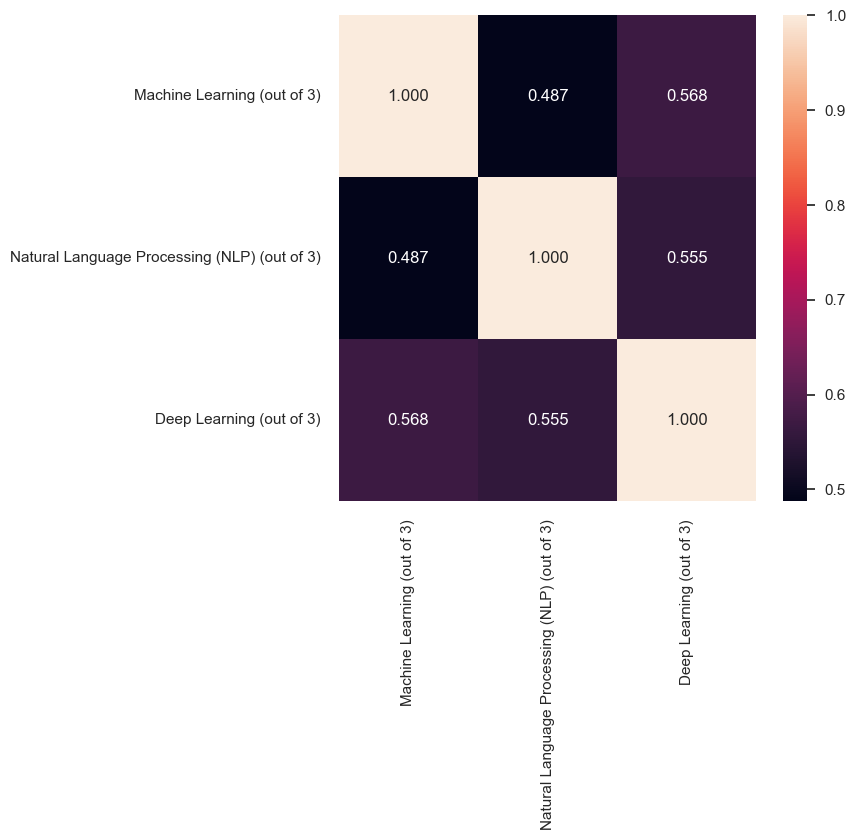

In [1550]:
sns.heatmap(app_data.iloc[:,1:4].corr(),annot=True,fmt='.3f')

<i>The above shows a very sensible positive correlation between the above skills. Machine Learning, Deep Learning, NLP are often successively(progressively) learned, as foundations of ML are pre-requisite for either, and understanding of Deep Learning is essential for NLP.</i> 

In [1551]:
# makes sense to average out the following

app_data['AI_rating_avg'] = np.round(app_data.iloc[:,1:4].sum(axis=1)/9,3)

In [1552]:
to_del = list(app_data.iloc[:,1:4].columns)
app_data.drop(columns=to_del,inplace=True)

<AxesSubplot:xlabel='Python (out of 3)', ylabel='AI_rating_avg'>

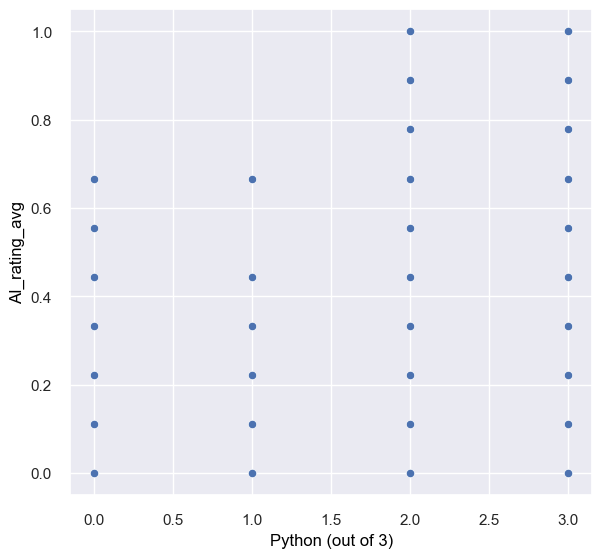

In [1553]:
sns.scatterplot(x=app_data['Python (out of 3)'],y=app_data['AI_rating_avg'])

# Other Skills

<b> Exploring the other skills section - as it includes other important technical skills </b>

In [290]:
from collections import Counter
other_skills_count = Counter()
for i in app_data['Other skills']:
    other_skills_count.update(str(i).split(', '))

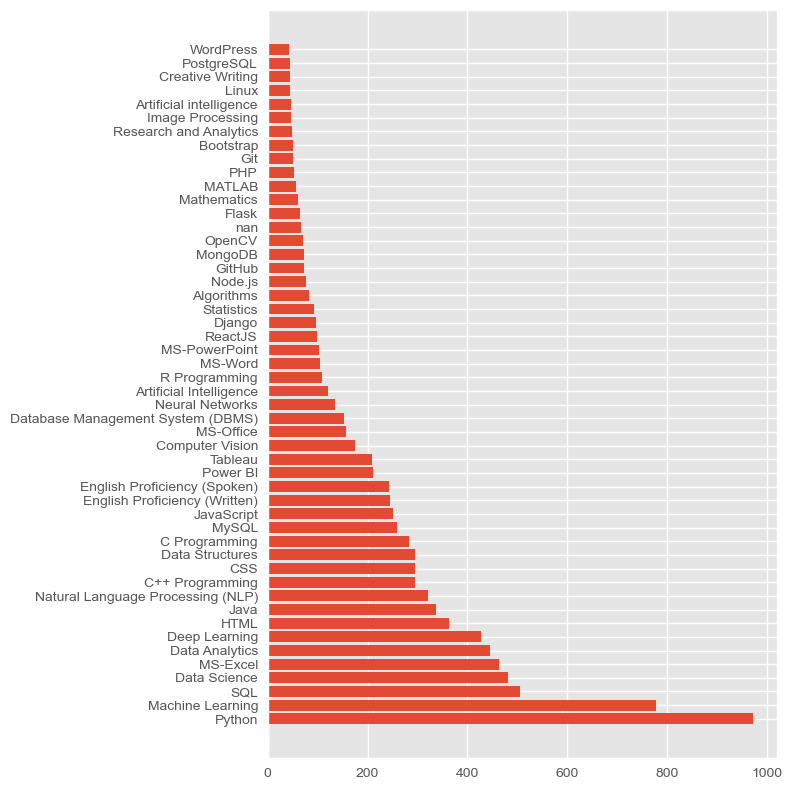

In [291]:
# Top 50 mentioned skills in the applicants data 

plt.style.use('ggplot')
other_skills_count_sorted = dict(sorted(other_skills_count.items(),key=lambda item: item[1],reverse=True))
labels = list(other_skills_count_sorted.keys())[:50]
values = list(other_skills_count_sorted.values())[:50]
plt.barh(labels, values)
plt.rcParams['figure.figsize'] = [8,8]
plt.tight_layout()

In [1554]:
skill_list_len = app_data['Other skills'].copy().apply(lambda x: len(str(x).split(', '))) # applied on the whole Series
skills_list_length = lambda x: len(str(x).split(', '))    # to use later (applied string wise)

/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


9.0

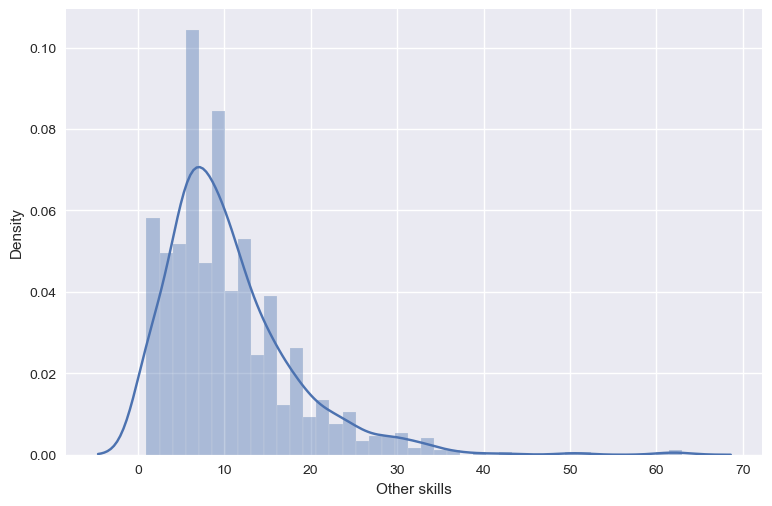

In [1069]:
plt.style.use('seaborn')
sns.distplot(skill_list_len)
plt.rcParams['figure.figsize'] = [6,6]
skill_list_len.median()

# Aim: we want to quanitfy the feature 'Other skills' to be able to determine how useful one's skillset is to the job

<b> Method 1: Using a doc2vec model trained from scratch on a employee/job applicant resume data to quantify how important are the other technical skills to the mentioned job role </b>
<br><br><b> Plan - </b><br>
<b><i>Preprocessed Unseen Doc("Other Skills") of every applicant --> Model Inference & Similarity Comparison --> Mathematical Function that quantifies "Other Skills" based on Job Role Similarity.</b></i>
<br><br>
<b>Approach:</b><br>
Step 1 - Train a Doc2Vec model on relevant resume data of experienced employees and other job applicants for several roles. (Model trained in the other notebook)<br>
Step 2 - Pickle the trained model for inference.<br>
Step 3 - Preprocess the "Other skills" feature in the original dataset. <br>
Step 4 - Develope a pipeline as mentioned in the plan.<br>
Step 5 - Model Inference as Similarity Comparison.<br>
Step 6 - Mathematical Function that quantifies the Other Skills based on Job Role Similarity to the Required Skills for the internship.<br><br>
<b>Mathematical Function: </b><br>
Given- Required Skills: <u>Python, Machine Learning, Deep Learning, Natural Language Processing.</u><br>
All of these required skills fall under the Data Science Job Role Umbrella (assumption/also can be proven using the employee/job aspirant data)<br>
I have also considered the job roles that involve a similar overlap of skillsets(as this is an intern role). The other job roles include: <u>'Business Analyst','Python Developer','Database','DevOps Engineer','Hadoop'.</u><br>
Henceforth, as infered from our model:<br><br>
Similarity of these secondary job profiles based on a corpus of resume to the primary job profile of a Data Science.<br>
<b><u>Results: Similarity Scores to Data Science</u></b><br>
[('Data Science', 1.0)<br>
('Python Developer', 0.6781377792358398)<br>
 ('Business Analyst', 0.6637634634971619)<br>
 ('Database', 0.6556861400604248)<br>
 ('Hadoop', 0.6413000226020813)<br>
 ('DevOps Engineer', 0.6296537518501282)]
 
<br><b>Considering the Similarity Scores as weights to scale the unseen doc i.e. Every Applicant's "Other skills" feature's similarity to all the considered job roles.<br></b>
<b>Formula:<br>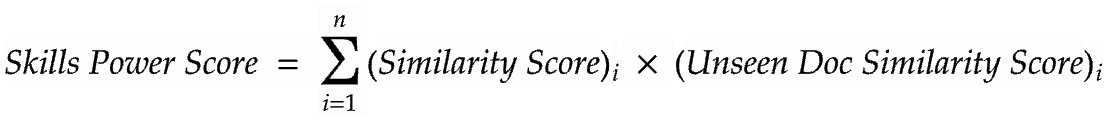
    
<br>
<i><b>Skill Power Score quantifies the Technical and Non Technical skills of the candidate in context to a given job role. It determines the skill relevance match score i.e. the power in skillset to influence the job role.</b></i>

here, i iterates over the list of all the considered and related primary and secondary job roles.

<br><br>

In [1555]:
# pickle the model
import pickle
pickle_filepath = 'Digipplus Assignment/Doc2Vec_SkillScreen.pkl'
with open(pickle_filepath, 'rb') as f:  # Load the saved model from the pickle file
    model = pickle.load(f)

In [1556]:
def cleanSkills(otherSkill):
    otherSkill = re.sub('http\S+\s*', ' ', otherSkill)  # remove URLs
    otherSkill = re.sub('RT|cc', ' ', otherSkill)  # remove RT and cc
    otherSkill = re.sub('#\S+', '', otherSkill)  # remove hashtags
    otherSkill = re.sub('@\S+', '  ', otherSkill)  # remove mentions
    otherSkill = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-/.:;<=>?@[\]^_`{|}~"""), ' ', otherSkill)  # remove punctuations
    otherSkill = re.sub(r'[^\x00-\x7f]',r' ', otherSkill) 
    otherSkill = re.sub('\s+', ' ', otherSkill)  # remove extra whitespace
    return otherSkill

In [1557]:
def preprocess(unseen):
    unseen = cleanSkills(unseen).lower().split()
    return unseen

In [1558]:
def inferenceNsimilarity(preprocessed_doc, Doc2VecModel):
    inferred_vector = Doc2VecModel.infer_vector(preprocessed_doc)
    inf_sim = Doc2VecModel.docvecs.most_similar([inferred_vector])
    inf_sim = dict(inf_sim)
    return inf_sim

In [1559]:
def secondaryJobRoleSimilarity(Doc2VecModel, primaryJR='Data Science'):
    secJRsim = Doc2VecModel.docvecs.most_similar(primaryJR)
    secJRsim = dict(secJRsim)
    secJRsim[primaryJR] = 1
    return secJRsim

In [1560]:
def PowerCalc(inf_sim, secJRsim):
    score = 0
    for i in inf_sim:
        score = score + secJRsim[i]*inf_sim[i]
    return score

In [1561]:
#Vanilla form of Skill Power Calculation

def skillPowerScore(otherSkill, Doc2VecModel=model):
    if otherSkill == np.nan:
        score = 0
    else:
        try:
            clean_doc = cleanSkills(otherSkill)
            preprocess_doc = preprocess(clean_doc)
            inf_sim = inferenceNsimilarity(preprocess_doc, Doc2VecModel)
            secJRsim = secondaryJobRoleSimilarity(Doc2VecModel)
#             print(inf_sim,'\n','\n',secJRsim)
            score = PowerCalc(inf_sim,secJRsim)
        except Exception as e:
            score = 0
#             print("An error occurred:", str(e))
    return score

<b>Improving Model Bias for Short Skill List with a catchy Keyword</b><br><br>
<i><u>For ex</u>: a skill list such as -- <b>['Python','Tableau']</b> would generate a higher Skill Power Score than other more relevant and exhaustive skill list such as --
<br> <b>['Adobe XD', 'BIG DATA ANALYTICS', 'Canva', 'Data Analytics', 'Data Science', 'Figma', 'MS-Excel', 'MS-PowerPoint', 'Python', 'Adobe Photoshop', 'C++ Programming', 'Data Structures', 'Machine Learning', 'Natural Language Processing (NLP)', 'SQL', 'Tableau', 'Amazon Web Services (AWS)', 'Computer Vision']</b></i>
<br><br>
This is because when catchy keywords such as Python and Tableau which are relevant to almost all the considered Job Profiles corpus used for training the Model leads to mapping the two catchy keywords across the high-dimensional vector space (consider as hidden layer's feature of the Doc2Vec Model i.e. the weights) which are similar hence sensitive to keywords and reflect strongly in the weights.<br>
While the more exhaustive skill list also consist of words that highlight overall skillset and might not necessarily trigger the similarity with the hidden layer weights as strongly when mapped in a higher dimensional vector space.<br>
<br>
Solution: 
On analysing the "Other skills" feature in the dataset, the Number of Skills mentioned in an applicant profile is a right-skewed distribution, with a median(avg) of 9 skillsets per candidate.<br>
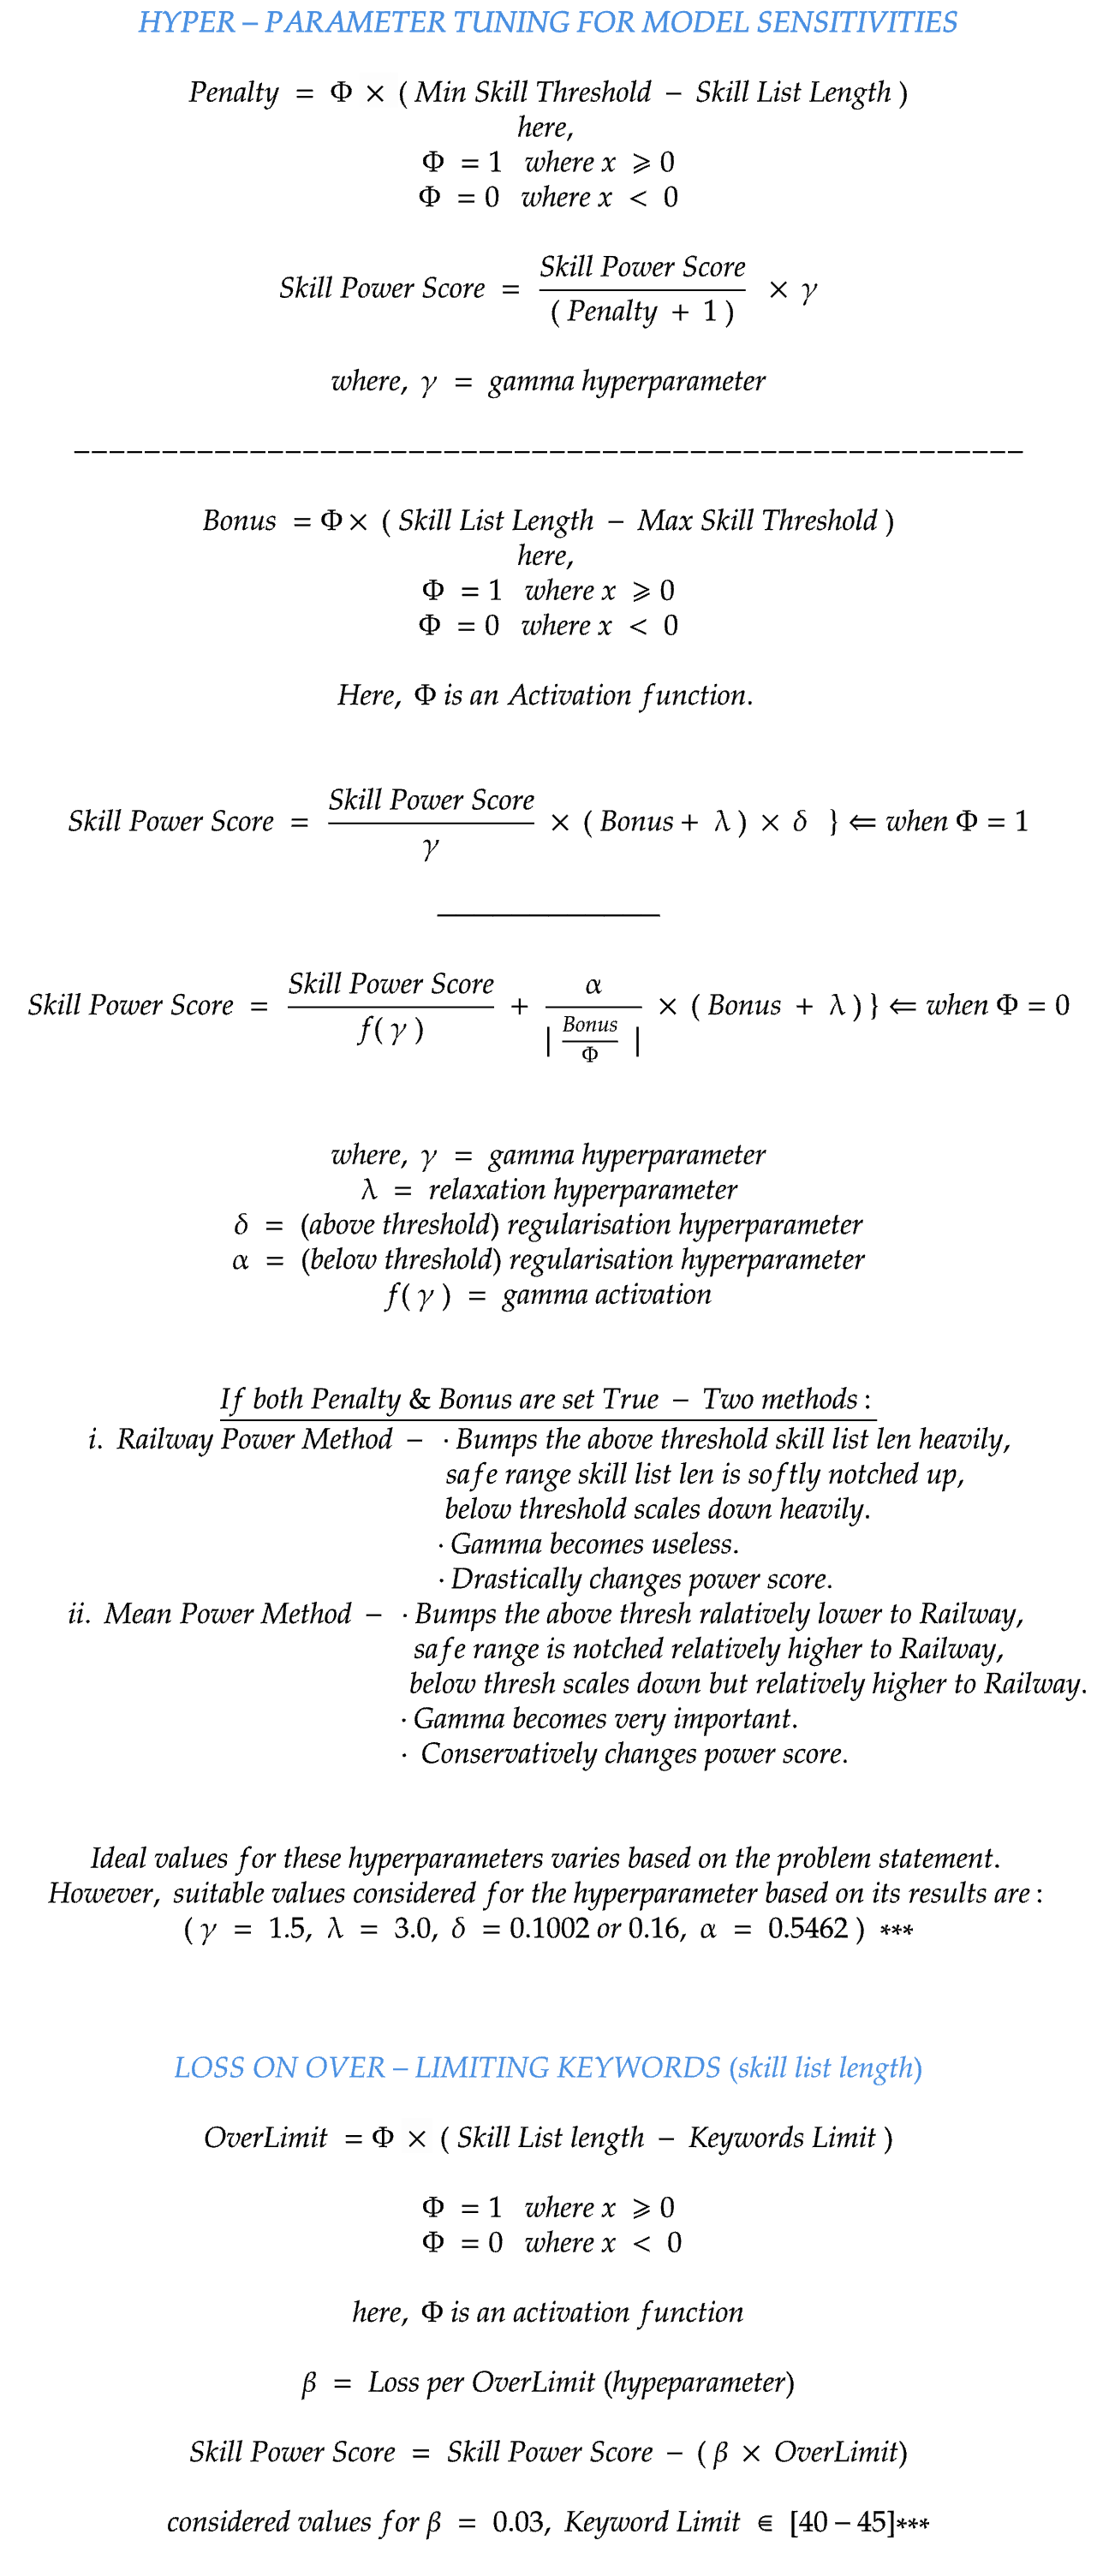<br><br>
<i><b>However, careful exercise with such hyperparameters are needed as it requires an understanding of the statistics of the skill list of Candidates. This mathematical formulation can well be further optimised to improve performance on more edge cases.</i></b><br>
<i> <u>Penalty hyperparam</u> - scales down the power for catchy keyword, shorter than threshold skillset [helps with model overfitting/sensitivity], also scales up the rest(quite a bit, so careful!!!)</i><br>
<i> <u>Bonus hyperparam</u> - scales up the power for exhaustive and comprehensive skill list, due to some not-so-catchy keywords, but also scales down power for all other skill list length not falling in that category</i>
    


In [1562]:
vanilla_skill_power_score = app_data['Other skills'].copy().apply(lambda x: skillPowerScore(x))

/var/folders/b5/p9rmdc817y36m0hgtkqmx93m0000gn/T/ipykernel_41814/2732307508.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  inf_sim = Doc2VecModel.docvecs.most_similar([inferred_vector])
/var/folders/b5/p9rmdc817y36m0hgtkqmx93m0000gn/T/ipykernel_41814/3697595239.py:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  secJRsim = Doc2VecModel.docvecs.most_similar(primaryJR)


/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


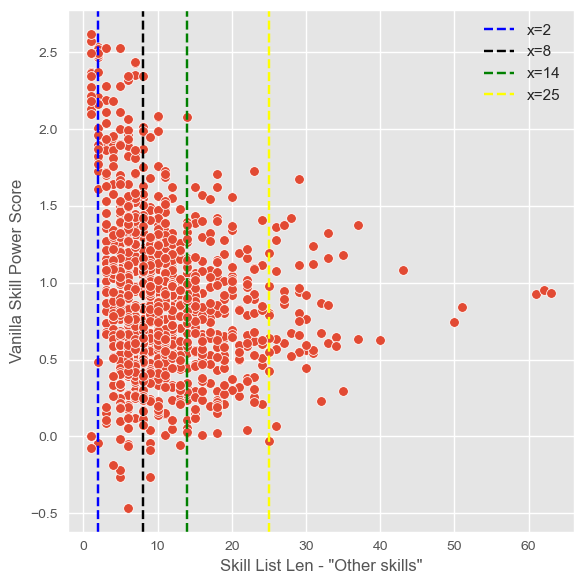

In [1078]:
plt.style.use('ggplot')
sns.scatterplot(skill_list_len,vanilla_skill_power_score)
plt.xlabel('Skill List Len - "Other skills"')
plt.ylabel('Vanilla Skill Power Score')
plt.axvline(x=2, color='blue', linestyle='--',label='x=2')
plt.axvline(x=8, color='black', linestyle='--',label='x=8')
plt.axvline(x=14, color='green', linestyle='--',label='x=14')
plt.axvline(x=25, color='yellow', linestyle='--',label='x=25')
sns.set(rc={'axes.labelcolor': 'black'})
plt.rcParams['figure.figsize'] = [6,6]
plt.legend()
plt.tight_layout()

<b>The following graph points to the DRAWBACKS of the vanilla form of model as pointed above in the text:</b><br>
<i><b>(i)</b> Skill Length below 8 or even as short as 1-4 with relevant catchy(sensitive) keywords to the training corpus
    obtain high Skill Power Score.<br> [Ideally should become drastically lesser]<br>
    <b>(ii)</b> Skill List Length in the suitable range(8-20) does reflect the model quantifies the profiles correctly. Hence it's a problem of model sensitivities.<br> [Maintain model performance while solving i & ii] <br>
    <b>(iii)</b> Higher Skill List Length regardless of relevant keywords to the job profile, are rated low due to needless/extra/irrelevant or not-so-catchy(dissimilar) keywords present to the training corpus.<br> [Ideally should become bigger]</i><br>
<br><br>
<b>These problems can be tackled by introducing <u>mathematical complexities or customised hyperparameters</u> to solve these drawbacks while maintaining the efficacy of the model.</b>

<b> Example: Drawback (iii)

In [336]:
search_condition_1 = lambda x: x > 40
indexes1 = [index for index, value in enumerate(skill_list_len) if search_condition_1(value)]

app_data['Other skills'][indexes1].apply(lambda x: print(x,'\n\n'))
(skill_list_len[indexes1],vanilla_skill_power_score[indexes1])

Content Writing, English Proficiency (Written), Java, MS-PowerPoint, MS-Word, ARM Microcontroller, Arduino, C Programming, C++ Programming, Canva, Cloud Computing, Computer Vision, Data Structures, Database Management System (DBMS), Effective Communication, Embedded Systems, English Proficiency (Spoken), Google Cloud Computing, HTML, Internet of Things (IoT), MS SQL Server, MS-Excel, MS-Office, Microsoft Azure, Microsoft Visual Studio, Python, SQL, Teaching, .NET, Amazon Web Services (AWS), Atmel AVR, CSS, Circuit Design, Data Analytics, Data Science, Deep Learning, Django, Eclipse (IDE), Engineering Drawing, Flask, Flutter, Hadoop, Image Processing, MEAN/MERN Stack, Machine Learning, MongoDB, Natural Language Processing (NLP), Neural Networks, Node.js, Online Teaching, PCB Design, PLC SCADA, R Programming, REST API, Raspberry Pi, ReactJS, Robotics, SQLite, Software Testing, Swing (Java), UI & UX Design 


MS-Excel, Mathematics, Adobe Photoshop, Algorithms, Angular 2.0, Angular 7.0, An

(75      61
 400     50
 445     62
 501     43
 814     63
 1125    51
 Name: Other skills, dtype: int64,
 75      0.915049
 400     0.680958
 445     1.023401
 501     1.080319
 814     0.970508
 1125    0.817733
 Name: Other skills, dtype: float64)

<b>Example: Not-a-Drawback (ii)</b>

In [341]:
search_condition_2 = lambda x,y: x > 8 and y > 1.5

indexes2 = [index for index,(value1,value2) in enumerate(zip(skill_list_len,vanilla_skill_power_score)) if search_condition_2(value1,value2)]

app_data['Other skills'][indexes2].apply(lambda x: print(x,'\n\n'))
(skill_list_len[indexes2],vanilla_skill_power_score[indexes2])

Adobe XD, BIG DATA ANALYTICS, Canva, Data Analytics, Data Science, Figma, MS-Excel, MS-PowerPoint, Python, Adobe Photoshop, C++ Programming, Data Structures, Machine Learning, Natural Language Processing (NLP), SQL, Tableau, Amazon Web Services (AWS), Computer Vision 


Cloud Computing, Amazon Web Services (AWS), C Programming, Computer Networking, Java, Machine Learning, Python, Blockchain, CSS, Deep Learning, Flutter, Internet of Things (IoT), MySQL, Natural Language Processing (NLP), PHP, SQL 


English Proficiency (Spoken), English Proficiency (Written), AutoCAD, MS-Excel, MS-Office, Statistical Modeling, Statistics, Data Analytics, Data Science, Deep Learning, Machine Learning, Natural Language Processing (NLP), Project Management, Python, SPSS, SQL, Tableau 


Computer Vision, Data Science, Deep Learning, MS-Excel, Natural Language Processing (NLP), Power BI, Python, SQL, Amazon Web Server (AWS), Amazon Web Services (AWS), C Programming, CSS, Data Analytics, Data Structures, Data

(3       18
 29      16
 31      17
 36      23
 66      12
 130     18
 141      9
 163     10
 242     15
 311     15
 336     11
 422     14
 430     10
 519      9
 523     10
 561     11
 589     20
 638     12
 676     11
 774     10
 786     11
 854     29
 964     10
 997     10
 1031    11
 1073    11
 1090     9
 1103    11
 Name: Other skills, dtype: int64,
 3       1.774647
 29      1.591909
 31      1.624719
 36      1.793266
 66      1.704300
 130     1.852853
 141     1.592743
 163     1.511774
 242     1.616525
 311     1.500161
 336     1.507227
 422     2.150451
 430     1.708460
 519     1.776622
 523     1.502279
 561     1.652365
 589     1.613932
 638     1.663092
 676     1.502762
 774     2.064785
 786     1.616721
 854     1.704694
 964     2.015023
 997     1.715832
 1031    1.716730
 1073    1.559159
 1090    2.017940
 1103    1.578824
 Name: Other skills, dtype: float64)

<b>Example: Drawback (i)</b>

In [1563]:
print(app_data['Other skills'][770])
print(skillPowerScore(app_data['Other skills'][770]))

EViews, Python, Tableau
2.349717949957462


/var/folders/b5/p9rmdc817y36m0hgtkqmx93m0000gn/T/ipykernel_41814/2732307508.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  inf_sim = Doc2VecModel.docvecs.most_similar([inferred_vector])
/var/folders/b5/p9rmdc817y36m0hgtkqmx93m0000gn/T/ipykernel_41814/3697595239.py:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  secJRsim = Doc2VecModel.docvecs.most_similar(primaryJR)


# Model Fine-Tuning (Hyperparameter Tuning)

<b><i>1. Activation functions</b></i>

In [1079]:
activationFunction = lambda value: 1 if value >= 0 else 0

def gamma_activation(gamma,method):
    if method=='Railway':
        return gamma
    else:
        return 1

<b><i>2. Penalty and Bonus for punishing(inflated scores) and boosting(diminished scores)</b></i>

In [1080]:
def Penalty(otherSkillsString, min_skill_threshold):
    skill_list_len = skills_list_length(otherSkillsString)
    value = (min_skill_threshold - skill_list_len)
    act = activationFunction(value)
    pen = act * value
    return (pen,act)
    
def Bonus(otherSkillsString, max_skill_threshold, mod=False):
    skill_list_len = skills_list_length(otherSkillsString)
    value = (skill_list_len - max_skill_threshold)
    act = activationFunction(value)    
    bon = act * value
    if mod == True:
        val = np.abs(value)
        return (bon,act,val)
    else:
        return (bon,act)

<b><i>3. Power Score functions for Penalty and Bonus</b></i>

In [1081]:
def penPower(otherSkillsString, min_skill_threshold, gamma, power):
    pen,act = Penalty(otherSkillsString, min_skill_threshold)
    power = (power*gamma)/(pen+1)
    return power

def bonPower(otherSkillsString, max_skill_threshold, gamma, lamda, delta, alpha, method, power):
    bon,act,val = Bonus(otherSkillsString, max_skill_threshold, mod=True)
    if act == 1:
        power = (power * (bon+lamda) * delta)/gamma
        return power
    else:
        power = (power/gamma_activation(gamma,method)) + (alpha*(bon+lamda))/val
        return power

<b><i>4. OverLimiting Keywords(skill list length) Fine</b></i>

In [1082]:
def OverLimit(otherSkillsString, keywords_limit, beta):
    skill_list_len = skills_list_length(otherSkillsString)
    value = (skill_list_len - keywords_limit)
    olimit = activationFunction(value) * value
    olimit = beta * olimit
    return olimit

<b><i>5. Constraints for Hyperparameter Tuning</b></i>

In [1083]:
# Constraints

def negative_arg_error(argument):
#    msg = [{'status':"Assigned arguement cannot be negative!"}, {'status':'ok'}]
    if argument < 0:
        return True

def zero_arg_error(argument):
#    msg = [{'status':"ZeroDivisionError!"}, {'status':'ok'}]
    if argument == 0:
        return True
    
def check_args(args):
    for i in args:
        if negative_arg_error(i):
            raise ValueError('Negative arguments not allowed for gamma and delta')
    if zero_arg_error(args[0]):
        raise ZeroDivisionError('Zero value not allowed for gamma')
    return {'status': 'ok'}

<b><i>6. Hyperparameter Function</b></i>

In [1084]:
def HyperParameterTuning(otherSkillsString, vpower, penalty, bonus,
                         min_skill_threshold, max_skill_threshold,
                         gamma, lamda, delta, alpha, suitable, method,
                         keywords_limit, beta):
    
    if (check_args([gamma,delta])['status'] == 'ok'):
        if suitable == True:
            gamma=1.5
            lamda=3.0
            delta=0.11
            alpha=0.5462
        
        if penalty==True and bonus==True:
            if method=='Railway':
                ppower = penPower(otherSkillsString, min_skill_threshold, gamma, vpower)
                bpower = bonPower(otherSkillsString, max_skill_threshold, gamma, lamda, delta, alpha, method, power=ppower)
                olimit = OverLimit(otherSkillsString, keywords_limit, beta)
                rpower = bpower - olimit
                return rpower
            elif method=='Mean':
                ppower = penPower(otherSkillsString, min_skill_threshold, gamma, vpower)
                bpower = bonPower(otherSkillsString, max_skill_threshold, gamma, lamda, delta, alpha, method, power=vpower)
                olimit = OverLimit(otherSkillsString, keywords_limit, beta)
                mpower = np.mean([ppower,bpower]) - olimit
                return mpower            

        elif penalty==True:
            ppower = penPower(otherSkillsString, min_skill_threshold, gamma, vpower)
            olimit = OverLimit(otherSkillsString, keywords_limit, beta)
            ppower = ppower - olimit
            return ppower

        elif bonus==True:
            bpower = bonPower(otherSkillsString, max_skill_threshold, gamma, lamda, delta, alpha, method, power=vpower)
            olimit = OverLimit(otherSkillsString, keywords_limit, beta)
            bpower = bpower - olimit
            return bpower

        else:
            olimit = OverLimit(otherSkillsString, keywords_limit, beta)
            vpower = vpower - olimit
            return vpower  


# Optimised Skill Power Score Model

In [1085]:
def OptskillPowerScore(otherSkill, Doc2VecModel=model, penalty=False, bonus=False,
                         min_skill_threshold=None, max_skill_threshold=None,
                         gamma=1, lamda=1, delta=1, alpha=None, suitable=False, method='Railway',
                         keywords_limit=40, beta=0):
    
    if otherSkill == np.nan:
        score = 0
    else:
        try:
            clean_doc = cleanSkills(otherSkill)
            preprocess_doc = preprocess(clean_doc)
            inf_sim = inferenceNsimilarity(preprocess_doc, Doc2VecModel)
            secJRsim = secondaryJobRoleSimilarity(Doc2VecModel)
#             print(inf_sim,'\n','\n',secJRsim)
            score = PowerCalc(inf_sim,secJRsim)
#            print(score)
            optScore = HyperParameterTuning(otherSkill, score, penalty=penalty, bonus=bonus,
                                    min_skill_threshold=min_skill_threshold, max_skill_threshold=max_skill_threshold,
                                 gamma=gamma, lamda=lamda, delta=delta, alpha=alpha,
                                 suitable=suitable, method=method, keywords_limit=keywords_limit, beta=beta)
            return optScore
        
        except Exception as e:
            score = 0
#            print("An error occurred:", str(e))
    return score

<b> Finally converting the other skills feature into a numerical number using the OptSkillPowerScore function to calculate how useful someone's skillset is for the job role. </b>

In [1566]:
app_data["Skill Power Score (from Other Skills)"] = app_data['Other skills'].copy().apply(lambda x: 
                                                                                          OptskillPowerScore(x, 
                                                                                                penalty=True,
                                                                                                bonus=True,
                                                                                                min_skill_threshold=7,
                                                                                                max_skill_threshold=25,
                                                                                                suitable=True,
                                                                                                beta=0.065))

/var/folders/b5/p9rmdc817y36m0hgtkqmx93m0000gn/T/ipykernel_41814/2732307508.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  inf_sim = Doc2VecModel.docvecs.most_similar([inferred_vector])
/var/folders/b5/p9rmdc817y36m0hgtkqmx93m0000gn/T/ipykernel_41814/3697595239.py:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  secJRsim = Doc2VecModel.docvecs.most_similar(primaryJR)


<b><i> improved results for the doc2vec model for unseen documents - in our case the Other skills feature<b></i>

/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


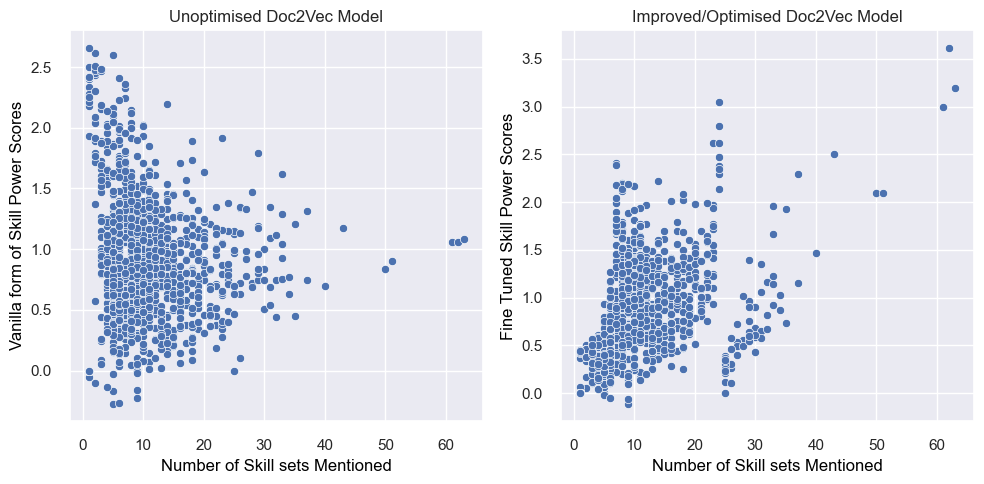

In [1567]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(skill_list_len, vanilla_skill_power_score, ax=axes[0])
axes[0].set_xlabel('Number of Skill sets Mentioned')
axes[0].set_ylabel('Vanilla form of Skill Power Scores')
axes[0].set_title('Unoptimised Doc2Vec Model')

sns.scatterplot(skill_list_len, app_data['Skill Power Score (from Other Skills)'], ax=axes[1])
axes[1].set_xlabel('Number of Skill sets Mentioned')
axes[1].set_ylabel('Fine Tuned Skill Power Scores')
axes[1].set_title('Improved/Optimised Doc2Vec Model')

plt.tight_layout()

/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AI_rating_avg', ylabel='Skill Power Score (from Other Skills)'>

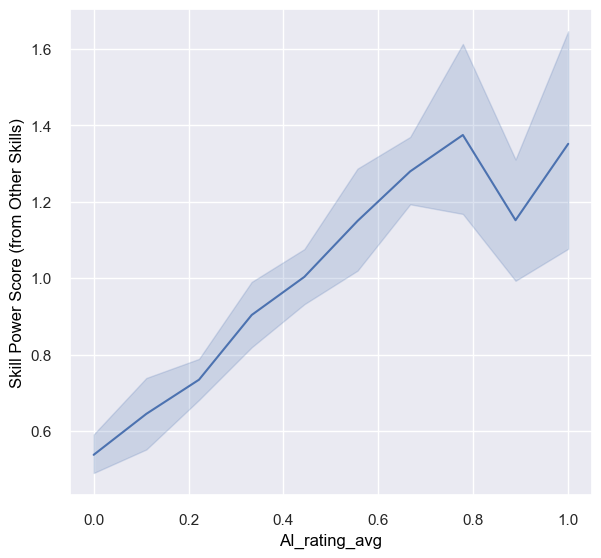

In [1568]:
x = app_data['AI_rating_avg']
y = app_data['Skill Power Score (from Other Skills)']
sns.lineplot(x,y)

In [1569]:
app_data.drop(columns='Other skills',inplace=True)

In [1570]:
print('Basic Doc2Vec Model Results:',spearmanr((app_data['AI_rating_avg']+app_data['Python (out of 3)']), vanilla_skill_power_score))

print('Improved Doc2Vec Model Results:', spearmanr((app_data['AI_rating_avg']+app_data['Python (out of 3)']), app_data['Skill Power Score (from Other Skills)']))

Basic Doc2Vec Model Results: SpearmanrResult(correlation=0.17053734083765634, pvalue=7.29518066825204e-09)
Improved Doc2Vec Model Results: SpearmanrResult(correlation=0.4527348449147562, pvalue=1.7180540028782345e-58)


In [1571]:
print('Cosine Similarity for Basic Doc2Vec: ',cosine_similarity(np.array(app_data['AI_rating_avg']+app_data['Python (out of 3)']).reshape(1,-1),
                  np.array(vanilla_skill_power_score).reshape(1,-1)))

print('Cosine Similarity for Improved Doc2Vec: ',cosine_similarity(np.array(app_data['AI_rating_avg']+app_data['Python (out of 3)']).reshape(1,-1),
                  np.array(app_data['Skill Power Score (from Other Skills)']).reshape(1,-1)))

Cosine Similarity for Basic Doc2Vec:  [[0.78671513]]
Cosine Similarity for Improved Doc2Vec:  [[0.84387482]]


<br><br><b>Alternative Method: To generate the relevant sub-groups of skills from the other skills feature can result in informed language model response, that can be fine tuned using the relevant parameters of it too.
<br>(Not used for the development of this solution)</b>

In [68]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 9.7 MB/s eta 0:00:00


In [78]:
import openai
import yaml

# store the secret information about your openai api key in a yaml file
file_path = 'openai_api.yaml'
with open(file_path, 'r') as file:
    secrets = yaml.safe_load(file)
    
# Set up authentication
openai.api_key = secrets['Secret Key']

# Define the skills list
skills = list(other_skills_count.keys())

# Generate informed responses using OpenAI API
def generate_responses(skills):
    prompts = [f"What are the relevant sub-groups for {skill}?" for skill in skills]
    model = "gpt-3.5-turbo"  # You can use other GPT models as well
    max_tokens = 300  # Set the maximum number of tokens in the response

    responses = openai.Completion.create(
        engine=model,
        prompt=prompts,
        max_tokens=max_tokens,
        n=1,  # Generate a single response for each prompt
        stop=None,
        temperature=0.4,
        top_p=1.0,
        frequency_penalty=0.0,
        presence_penalty=0.0
    )

    sub_groups = []
    for choice in responses.choices:
        text = choice.text.strip().split('\n')[0]  # Extract the first line of the response
        sub_groups.append(text)

    return sub_groups


# Generate and print the sub-groups for skills
sub_groups = generate_responses(skills)
for skill, sub_group in zip(skills, sub_groups):
    print(f"{skill}: {sub_group}")

RateLimitError: You exceeded your current quota, please check your plan and billing details.

# Availability

In [1094]:
app_data['Are you available for 3 months, starting immediately, for a full-time work from home internship? '].value_counts()

Yes, I am available for 3 months starting immediately for a full-time internship.                                                                                                                                                                                                                                                                                                                                                                                                                                    1112
No, From December of this year.                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Applicants answer starting with <b>Yes</b> - 1112<br>
Applicants answer starting with <b>No</b> - 24<br><br>
Can encode the following with (1,0).<br>
However, if extra analysis needed - can use regex to parse months in the answer starting with No, and then subtracting penalty from 1 depending on how far is the mentioned month from the desired starting/joining timeline of the company. May or may not be useful depending how these applicant's excel in rest of the features.<br>

In [1572]:
app_data['Availability'] = app_data['Are you available for 3 months, starting immediately, for a full-time work from home internship? '].apply(
    lambda x: x.split(',')[0])
app_data['Availability'].replace(to_replace={'Yes':1,'No':0},inplace=True)

In [1573]:
app_data.drop(columns=['Are you available for 3 months, starting immediately, for a full-time work from home internship? '],inplace=True)


# Degree and Stream

<b>Approach:<br></b>
"Stream" gives us the necessary information about the specialisation applicant's pursuing.<br>
Therefore "Degree" can be used to measure the highest qualification i.e. Bachelors, Masters, etc.<br>

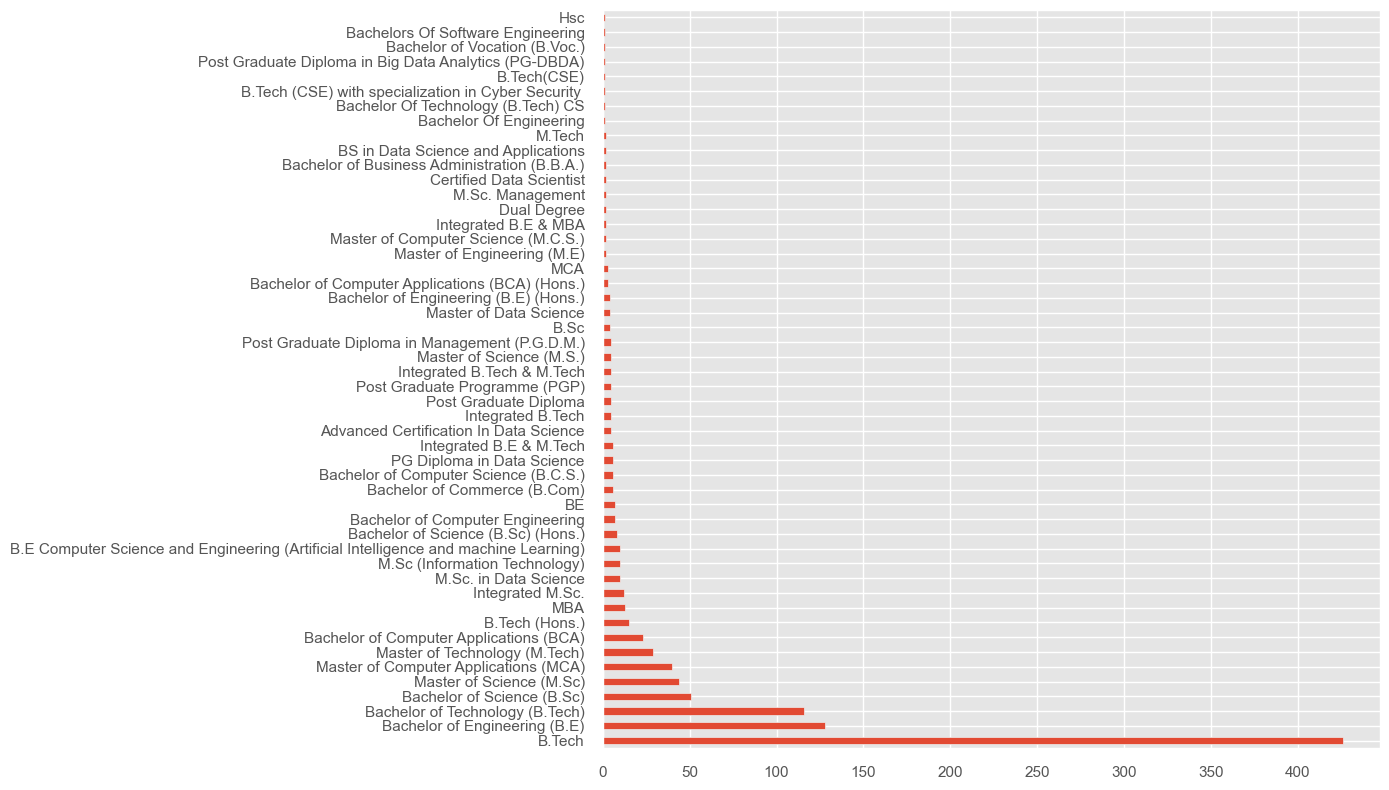

In [1581]:
# Top 50 degree's pursued by the applicants
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14,8]
app_data.Degree.value_counts().head(50).plot(kind='barh')
plt.tight_layout()

In [562]:
sorted(dict(app_data.Degree.value_counts()).items(),reverse=True)

[('Post Graduation Diploma', 1),
 ('Post Graduate Programme (PGP)', 5),
 ('Post Graduate Diploma in Management (P.G.D.M.)', 5),
 ('Post Graduate Diploma in Human Resource Management (P.G.D.H.R.M.)', 1),
 ('Post Graduate Diploma in Big Data Analytics (PG-DBDA)', 1),
 ('Post Graduate Diploma In Data Analytics And Machine Learning', 1),
 ('Post Graduate Diploma In Computer Applications (P.G.D.C.A.)', 1),
 ('Post Graduate Diploma', 5),
 ('PGP', 1),
 ('PG Diploma in Data Science', 6),
 ('Msc.Data Analytics', 1),
 ('Ms In Data Science', 1),
 ('Master of Technology (M.Tech)', 29),
 ('Master of Science (M.Sc) (Tech)', 1),
 ('Master of Science (M.Sc)', 44),
 ('Master of Science (M.S.)', 5),
 ('Master of Information Technology (M.I.T.)', 1),
 ('Master of Engineering (M.E)', 2),
 ('Master of Data Science', 4),
 ('Master of Computer Science (M.C.S.)', 2),
 ('Master of Computer Applications (MCA)', 40),
 ('Master of Arts (M.A.)', 1),
 ('Master in Artificial intelligence', 1),
 ('Master Of Science',

Edge Cases: 'ITI Electrical Engineering', 'Automobile Engineering', 'Hsc', 'High School Student. I Want An Internship', Degrees with word "Certifi" in it, Diploma, 

In [1582]:
degree_list = []
for cnt,i in enumerate(app_data.Degree):
    #print(cnt)
    if type(i)==float:
        
        degree_list.append('NA')              # Degree not available
    else:
        if i.lower()[0] == 'b':
            degree_list.append('Bachelors')       # Bachelors
        elif i == 'ITI Electrical Engineering' or i == 'Automobile Engineering':
            degree_list.append('Bachelors')       # Bachelors
        elif 'School' in i or i == 'Hsc':
            degree_list.append('High School')     # High School
        elif 'certifi' in i.lower():
            degree_list.append('Certification')   # Certification Courses
        elif 'diploma' in i.lower():
            degree_list.append('Diploma')         # Diploma
        else:
            degree_list.append('Masters')         # Masters

In [1583]:
app_data['Degree'] = degree_list

In [1584]:
degree_absent

,Python (out of 3),Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,AI_rating_avg,Skill Power Score (from Other Skills),Availability,absent_degree_fill
53,2,NA,NaN,0,NaN,NaN,NaN,NaN,0.222,0.658251,1,Bachelors
71,2,NA,Data Analytics,2023,NaN,6.02/100,84.00/84.00,8.80/8.80,0.222,1.301258,1,Bachelors
74,1,NA,NaN,0,NaN,NaN,60.00/60.00,77.00/77.00,0.111,0.414205,1,Bachelors
109,0,NA,Data Science,2023,NaN,NaN,NaN,NaN,0.000,0.000000,1,Bachelors
151,0,NA,Data Science,2022,NaN,70.00/100,6.70/6.70,6.10/6.10,0.000,0.000000,1,Bachelors
164,3,NA,NaN,0,NaN,NaN,80.20/80.20,NaN,0.778,1.004783,1,Bachelors
209,0,NA,NaN,0,NaN,NaN,9.20/9.20,NaN,0.000,0.000000,1,Bachelors
299,3,NA,Information Technology,2022,NaN,85.50/100,NaN,NaN,0.889,1.683305,1,Bachelors
304,2,NA,Business Analytics,2022,NaN,3.21/5,NaN,NaN,0.222,0.223223,1,Bachelors
416,2,NA,Data Analytics,2023,NaN,7.50/8,NaN,NaN,0.000,0.191825,1,Bachelors


In [1585]:
degree_absent = app_data[app_data.Degree=='NA']

degree_present = app_data[app_data.Degree!='NA']

In [1586]:
absent_degree_fill = []
for i in degree_absent[['Performance_UG','Performance_PG']].iterrows():
    if pd.isna(i[1]['Performance_PG']) == False:
        hq = 'Masters'
    elif pd.isna(i[1]['Performance_UG']) == False:
        hq = 'Bachelors'
    else:
        hq='missing'
    absent_degree_fill.append(hq)

In [1587]:
degree_absent['absent_degree_fill'] = absent_degree_fill

/var/folders/b5/p9rmdc817y36m0hgtkqmx93m0000gn/T/ipykernel_41814/4084317115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_absent['absent_degree_fill'] = absent_degree_fill


In [1588]:
# [['Degree','Stream','Current Year Of Graduation','Performance_PG','Performance_UG']]
degree_absent.loc[(degree_absent['absent_degree_fill']=='missing')].Stream.value_counts()

Data Science                                   3
Mechanical Engineering                         1
Computer Science & Engineering                 1
Computer Science & Technology                  1
Computer Technology                            1
Post Graduate Diploma In Big Data Analytics    1
Finance                                        1
Data Analytics                                 1
Civil Engineering                              1
Computational Mechanics                        1
Name: Stream, dtype: int64

<b><i> out of this, we classify the explicitly stated Post Graduate Diploma as Masters for Degree, for the rest we consider it as Bachelor <b></i>

In [1589]:
# degree_absent['absent_degree_fill'].value_counts()
degree_absent.loc[(degree_absent['absent_degree_fill']=='missing') & 
                  (degree_absent['Stream']=='Post Graduate Diploma In Big Data Analytics'), 'absent_degree_fill'] = 'Masters'
degree_absent.loc[(degree_absent['absent_degree_fill']=='missing'), 'absent_degree_fill'] = 'Bachelors'

In [1590]:
app_data.loc[app_data['Degree'] == 'NA', 'Degree'] = degree_absent['absent_degree_fill']

<b>Stream : The approach here is to filter the stream into if it's a prefered course relevant to the role or not.<b>

In [663]:
app_data.Stream.value_counts().head(50)

Computer Science & Engineering                         220
Computer Science                                        88
computer science                                        68
Information Technology                                  60
Data Science                                            56
Electronics and Communication                           54
Mechanical Engineering                                  35
Artificial Intelligence And Data Science                21
Data Analytics                                          16
Mathematics                                             15
Computer Application                                    14
Electronics and Telecommunication Engineering (ETE)     13
Civil Engineering                                       12
Statistics                                              12
Artificial Intelligence                                 11
Artificial Intelligence And Machine Learning            11
Electrical and Electronics Engineering                  

In [655]:
app_data.Stream.value_counts().tail(50)

Geography                                                         1
Biomedical Engineering                                            1
Python,sql                                                        1
Computational Data Science                                        1
Computer Sciences &Engineering                                    1
CSE Hons DS&AI                                                    1
Metallurgical And Materials Engineering                           1
Statistics Computing( DATA Science )                              1
Networks And Communication                                        1
Data Science And Business Analytics                               1
Computer Applications                                             1
Analytics And Finance                                             1
Information and Communication Technology                          1
Data Science And Analytics                                        1
Artificial Intelligence & Internet Of Things    

In [1591]:
# substrings that trigger a match to the prefered degrees relevant to the job role in our dataset --
# [computer, information, machine learning, data, cs, ai, ml, it, math, software, etc.]

def course_stream(text):
    pattern = r"(computer|information|machine learning|data|cs|ai|ml|it|math|software|statistics|analytics|computation|artificial)"
    text = str(text).lower()
    matches = re.findall(pattern, text)
    if len(matches)>0:
        return 'Prefered'
    else:
        return 'Others'

In [1592]:
app_data.Stream.isna().sum()

170

In [1593]:
stream = app_data['Stream'].copy().apply(lambda x: course_stream(x))

app_data['Stream'] = stream

# Current Year of Graduation

In [1594]:
app_data['Current Year Of Graduation'].isna().sum() #no missing values

0

<AxesSubplot:>

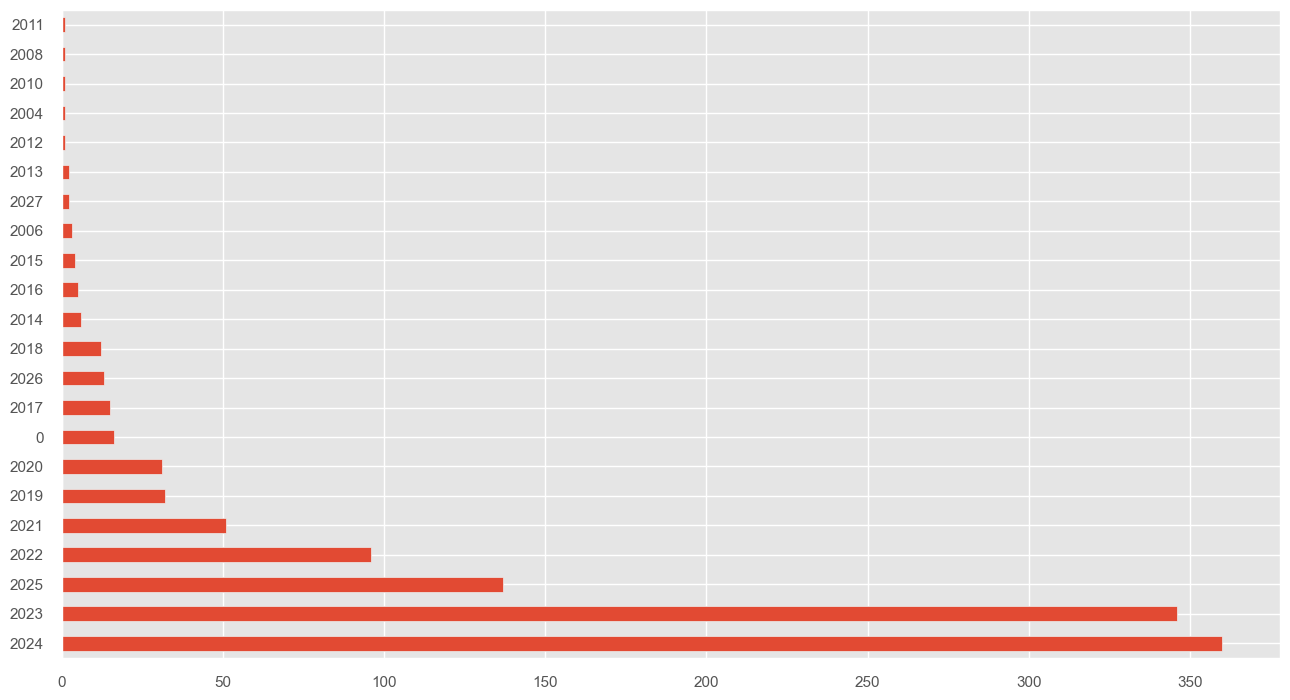

In [1595]:
app_data['Current Year Of Graduation'].value_counts().plot(kind='barh') 

In [1126]:
#Exploring the anomalous value of 0 in Current Year Of Graduation variable
refs_data.loc[refs_data['Current Year Of Graduation']==0][['Degree', 'Stream', 'Current Year Of Graduation',
                                                          'Performance_PG', 'Performance_UG', 'Performance_12', 
                                                           'Performance_10']]

,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
53,Bachelors,NaN,0,NaN,NaN,NaN,NaN
74,Bachelors,NaN,0,NaN,NaN,60.00/60.00,77.00/77.00
164,Bachelors,NaN,0,NaN,NaN,80.20/80.20,NaN
209,Bachelors,NaN,0,NaN,NaN,9.20/9.20,NaN
473,Bachelors,NaN,0,NaN,NaN,NaN,NaN
557,Bachelors,NaN,0,NaN,NaN,7.00/7.00,NaN
612,Bachelors,NaN,0,NaN,NaN,NaN,NaN
624,Bachelors,NaN,0,NaN,NaN,NaN,NaN
649,Bachelors,NaN,0,NaN,NaN,91.25/91.25,89.00/89.00
677,Bachelors,NaN,0,NaN,NaN,10.00/10.00,10.00/10.00


<b>applicants with Current Year of Graduation as 0 are people with High School as Highest Qualification</b>

In [1596]:
app_data.loc[app_data['Current Year Of Graduation']==0,'Degree'] = 'High School'

<b> Let's explore further, to see if Current Year of Graduation has any correlation with your skillset. <br></b>

/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Year Of Graduation', ylabel='Skill Power Score (from Other Skills)'>

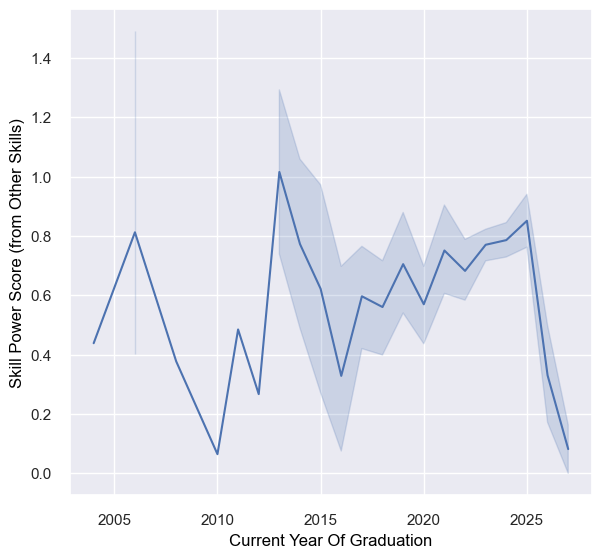

In [1128]:
x = app_data.loc[app_data['Current Year Of Graduation']!=0]['Current Year Of Graduation']
y = app_data.loc[app_data['Current Year Of Graduation']!=0]['Skill Power Score (from Other Skills)']
sns.lineplot(x,y,)

<b>The image isn't clearly conclusive as a lot of the years only consist of a single datapoint, so we can't filter desirable year of graduation from here. So we need to investigate deeper.</b>

/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Year Of Graduation', ylabel='Skill Power Score (from Other Skills)'>

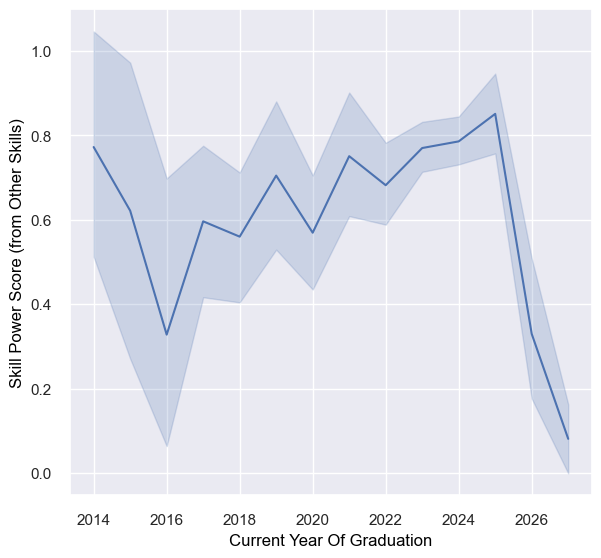

In [1129]:
x = app_data.loc[(app_data['Current Year Of Graduation']!=0) & (app_data['Current Year Of Graduation']>=2014)]['Current Year Of Graduation']
y = app_data.loc[(app_data['Current Year Of Graduation']!=0) & (app_data['Current Year Of Graduation']>=2014)]['Skill Power Score (from Other Skills)']
sns.lineplot(x,y,)

<b>The above lineplot across years measuring the skill set power score, shows a very valuable insight.</b><br>
<b>The range of 2021 to 2025 as Current Year Of Graduation shows strong confidence in high skill power score and aligns with the idea that recent graduates or upcoming graduates within +- 2 year period of now is desirable but before we assign them 'preference' and keep the rest as 'others', we must explore other features across years.</B>

/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

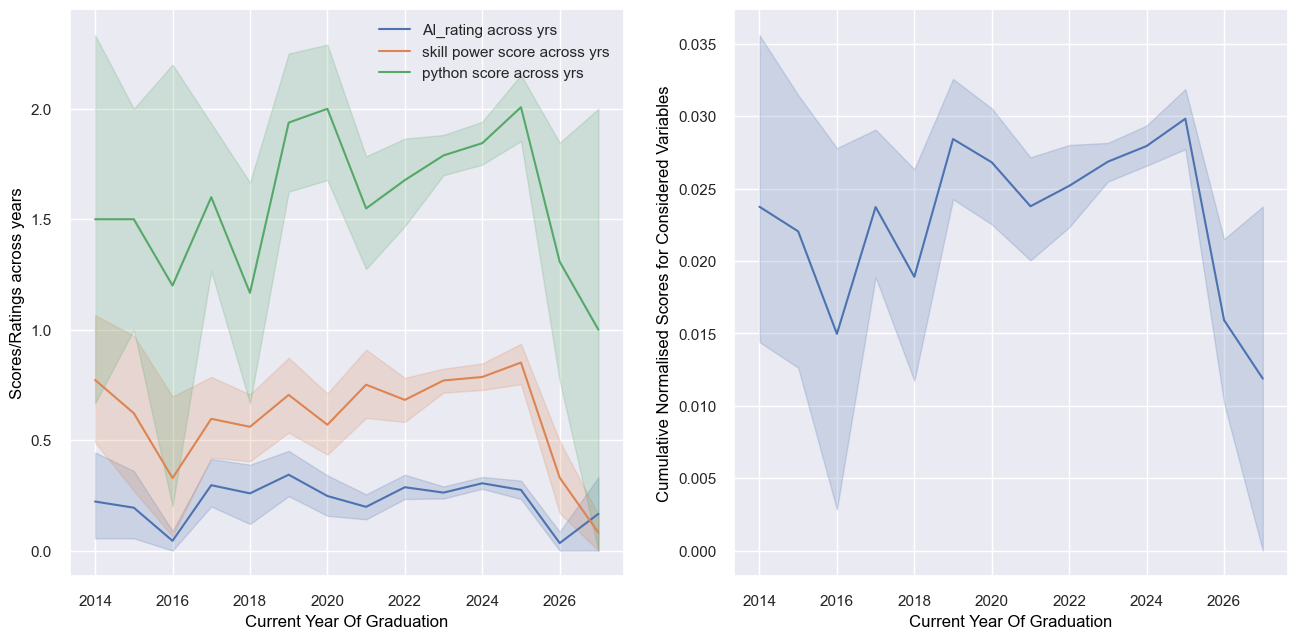

In [1131]:
x = app_data.loc[(app_data['Current Year Of Graduation']!=0) & (app_data['Current Year Of Graduation']>=2014)]['Current Year Of Graduation']
a = app_data.loc[(app_data['Current Year Of Graduation']!=0) & (app_data['Current Year Of Graduation']>=2014)]['AI_rating_avg']
b = app_data.loc[(app_data['Current Year Of Graduation']!=0) & (app_data['Current Year Of Graduation']>=2014)]['Skill Power Score (from Other Skills)']
c = app_data.loc[(app_data['Current Year Of Graduation']!=0) & (app_data['Current Year Of Graduation']>=2014)]['Python (out of 3)']

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.lineplot(x,a,label='AI_rating across yrs',ax=axes[0])
sns.lineplot(x,b,label='skill power score across yrs',ax=axes[0])
sns.lineplot(x,c,label='python score across yrs',ax=axes[0])
axes[0].set_ylabel('Scores/Ratings across years')

sns.lineplot(x,normalize(np.array(a+b+c).reshape(1,-1))[0],ax=axes[1])
axes[1].set_ylabel('Cumulative Normalised Scores for Considered Variables')

plt.legend()

<br><b>                     AI_rating_avg/Python Score/Skill Power Score VS Current Year of Graduation <b><br><br>
<b>Unlike our first hypothesis, the desirable range of Current Year Of Graduation seems 2019 to 2025 based on the multivariate analysis with AI_rating_avg(derived from Machine Learning, NLP, Deep Learning score out of 3), Python Score Out of 3, and Skill Power Score (derived from Other skills)</b><br>
<i>1. 2019 to 2025 progressively increases across years in Skill Power Score.<br>
   2. 2019,2020 leads 2021 in python and AI_rating and then starts increasing again up till 2025.<br>
   3. However we have more statistical confidence in recent years estimates as there are more datapoints in that region</i><br>

In [1597]:
# [2019,2025]
app_data.loc[(app_data['Current Year Of Graduation']>=2019) 
             & (app_data['Current Year Of Graduation']<=2025),'Current Year Of Graduation'] = 'Prefered'
# [0,2019) Union (2025,Infinity]
app_data.loc[(app_data['Current Year Of Graduation'] != 'Prefered'),'Current Year Of Graduation'] = 'Others'

In [1598]:
app_data['Current Year Of Graduation'].value_counts()

Prefered    1053
Others        83
Name: Current Year Of Graduation, dtype: int64

# Performances [PG, UG, 12th, 10th]

<b>amount of missing data in each column here (percentage wise)</b>

In [1599]:
app_data[app_data.columns[4:8]].isna().sum()/app_data.shape[0]

Performance_PG    0.838028
Performance_UG    0.575704
Performance_12    0.566021
Performance_10    0.624120
dtype: float64

1. Majority of the missing data in Performance_PG is due not many applicants NOT being PG students.<br>
2. Whereas more  half the data for eligible Bachelor applicant is missing.<br>
3. Performance 11th and 12th are vastly missing and shouldn't really account for much.
4. We can't impute data here as marks secured by a person is dependent on a lot of subjects and can't be predicted otherwise with no conclusive proof that the data we have determines how much marks someone would score. However, a mean score could be used assuming in mind that a mean doesn't have predictive power(concept of covariance).<br>

<b>Prob 1 with Performance Data:<br> Grade System (Marks Out of) is different for different applicants, so we had to scale marks with a consistent grade system(Out of 10)</b>

In [1600]:
# for example (Prob 1):
# Different kinds of marking system for UG
app_data[app_data['Performance_UG'].isna()==False]['Performance_UG'].copy().apply(lambda x: x.split('/')[1]).value_counts()

10     365
100     67
8       15
7       14
9       13
4        6
5        2
Name: Performance_UG, dtype: int64

In [1601]:
# for example (Prob 1):
# Different kinds of marking system for PG
app_data[app_data['Performance_PG'].isna()==False]['Performance_PG'].copy().apply(lambda x: x.split('/')[1]).value_counts()

10     128
100     33
8       11
7        4
9        4
4        3
5        1
Name: Performance_PG, dtype: int64

In [1602]:
def ConsistentMarkingSystem(x, scaling_factor=10):
    if type(x) == float:   # when value is None - either 0 or Mean (we'll go with 0, if we want can do Mean later)
        return 0
    else:
        denom = float(x.split('/')[1])
        numer = float(x.split('/')[0])
        new_marks = (numer/denom)*scaling_factor
        return new_marks

In [1603]:
app_data['Performance_PG'] = app_data['Performance_PG'].copy().apply(lambda x: ConsistentMarkingSystem(x))
app_data['Performance_UG'] = app_data['Performance_UG'].copy().apply(lambda x: ConsistentMarkingSystem(x))

Data Input inconsistency: Some of the applicants have secured less than 1 on a scale of 10 after transformation, on exploring this, I discovered applicants potentially wrote their marks secured out of 10 as out of 100, which led to this. So we'll corect this by multiplying with 10.

In [1604]:
app_data.loc[(app_data['Performance_PG']<=1) & (app_data['Performance_PG']>0)]

,Python (out of 3),Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,AI_rating_avg,Skill Power Score (from Other Skills),Availability
243,2,Masters,Prefered,Prefered,0.730,0.0,81.00/81.00,83.00/83.00,0.556,2.406250,1
583,3,Diploma,Others,Prefered,0.907,0.0,NaN,8.80/8.80,0.222,0.424689,1
795,0,Masters,Prefered,Prefered,0.700,10.0,NaN,NaN,0.000,0.000000,1
825,3,Certification,Prefered,Prefered,0.500,0.0,NaN,NaN,0.333,0.346003,1
1117,1,Masters,Prefered,Prefered,0.600,0.0,NaN,7.50/7.50,0.000,0.501177,1


In [1605]:
# Data Input Problem
ind = app_data.loc[(app_data['Performance_PG']<1) & (app_data['Performance_PG']>0)].index
refs_data.loc[ind,:]['Performance_PG']

243     7.30/100
583     9.07/100
795     7.00/100
825     5.00/100
1117    6.00/100
Name: Performance_PG, dtype: object

In [1606]:
app_data.loc[ind,'Performance_PG'] = app_data.loc[ind,'Performance_PG']*10

<b>Prob 2 with Performance Data: In Performance_12 & Performance_10 feature<br>
Total Percentage/CGPA here is shown as the Percentage actually secured by the applicant, so we have to remove that anomaly, while also scaling the data here into a consistent format.

In [1607]:
# for example:
app_data[app_data['Performance_12'].isna()==False]['Performance_12'].value_counts()

78.00/78.00    13
95.00/95.00    10
90.00/90.00     8
91.00/91.00     8
80.00/80.00     8
               ..
77.40/77.40     1
62.92/62.92     1
82.15/82.15     1
71.69/71.69     1
82.80/82.80     1
Name: Performance_12, Length: 266, dtype: int64

In [1608]:
# for example :
app_data[app_data['Performance_10'].isna()==False]['Performance_10'].value_counts()

10.00/10.00    50
8.80/8.80      15
9.80/9.80      13
9.60/9.60      12
9.00/9.00      10
               ..
86.00/86.00     1
92.70/92.70     1
67.40/67.40     1
70.80/70.80     1
82.60/82.60     1
Name: Performance_10, Length: 172, dtype: int64

In [1609]:
def ConsistentMarking_12(x,scaling_factor=10):
    if type(x) == float:
        return 0
    else:
        x = float(x.split('/')[0])
        if x <= 10: #marks in cgpa out of 10
            return x
        else:
            x = (x/100)*scaling_factor #marks in percentage out of 100
            return x

In [1610]:
def ConsistentMarking_10(x,scaling_factor=10):
    if type(x) == float:
        return 0
    else:
        x = float(x.split('/')[0])
        if x <= 10:   # marks in cgpa
            x = ((x*9.5)/100)*scaling_factor # to convert cgpa to percentage [cbse rule: multiply by 9.5] then scale it to 10
            return x
        else:
            return (x/100)*scaling_factor# marks in percentage

In [1611]:
app_data['Performance_12'] = refs_data['Performance_12'].copy().apply(lambda x: ConsistentMarking_12(x))
app_data['Performance_10'] = refs_data['Performance_10'].copy().apply(lambda x: ConsistentMarking_10(x))

<b> some anomalies in the data due to errored data entry from applicant</b>

In [1612]:
refs_data.iloc[1078,:]['Performance_PG']

'64.46/8'

In [1613]:
# leads to wrong scaling of marks
app_data.loc[app_data['Performance_PG']>10]

,Python (out of 3),Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,AI_rating_avg,Skill Power Score (from Other Skills),Availability
1078,2,Masters,Prefered,Others,80.575,0.0,0.0,0.0,0.556,1.827736,1


In [1614]:
refs_data.iloc[200,:]['Performance_UG']

'73.53/7'

In [1615]:
# similarly, leads to wrong scaling of marks
app_data.loc[app_data['Performance_UG']>10]

,Python (out of 3),Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,AI_rating_avg,Skill Power Score (from Other Skills),Availability
200,1,Bachelors,Prefered,Prefered,0.0,105.042857,0.0,8.66,0.0,0.191203,1


In [1616]:
app_data.iloc[1078,4] = (float(refs_data.iloc[1078,:]['Performance_PG'].split('/')[0])/100)*10
app_data.iloc[200,5] = (float(refs_data.iloc[200,:]['Performance_UG'].split('/')[0])/100)*10

# --------------------------------------------------------------------------------------

# So finally after dealing with all the features this is how our final data looks

# --------------------------------------------------------------------------------------

In [1617]:
app_data # processed app_data from raw app_data

,Python (out of 3),Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,AI_rating_avg,Skill Power Score (from Other Skills),Availability
0,1,Bachelors,Prefered,Prefered,0.0,9.285714,0.00,0.0,0.111,0.391182,1
1,2,Bachelors,Prefered,Prefered,0.0,8.900000,0.00,0.0,0.000,1.662336,1
2,2,Masters,Prefered,Prefered,0.0,0.000000,0.00,0.0,0.222,1.090940,1
3,3,Bachelors,Others,Prefered,0.0,0.000000,8.56,9.5,0.444,2.024409,1
4,2,Bachelors,Prefered,Prefered,0.0,8.100000,9.34,9.5,0.222,0.246294,1
...,...,...,...,...,...,...,...,...,...,...,...
1131,2,Bachelors,Others,Prefered,0.0,0.000000,0.00,0.0,0.444,1.620201,1
1132,3,Bachelors,Prefered,Prefered,0.0,0.000000,0.00,0.0,0.889,1.383379,1
1133,3,Bachelors,Prefered,Prefered,0.0,8.770000,9.40,0.0,0.778,0.483622,1
1134,2,Bachelors,Prefered,Prefered,0.0,7.900000,9.00,0.0,0.111,0.160943,1


<b>Before applying any predictive or recommending model, we must transform our columns into numerical format and any last bit of logic</b>

1. Degree - Ordinal Encode<br>
2. Stream - Ordinal Encode (0/1)<br>
3. Normalise the Contionous Numerical Data<br>
4. Performance_PG, Performance_UG - Convert into single column and take the max<br>
5. Performance_12, Performance_10 - Convert them into a useful format based on some (But overall do not give heavy weightage to these feature)<br>
6. Some strategy regarding a lot 0(ie missing) values in Performance_UG/PG column.<br>

In [1618]:
app_data['Performance_UG/PG'] = pd.concat([app_data['Performance_UG'],app_data['Performance_PG']],axis=1).max(axis=1)

In [1619]:
app_data.drop(columns=['Performance_UG','Performance_PG'],inplace=True)

<b>Background Thought:<br>-Class 10th marks generally do not matter at all while hiring for startups, and when they're considered it often acts as an eligibility criteria.<br>
-Similarly for class 12th marks, but students achieving 95% or above in 12th are top rank holders and must be considered in that spirit.<br></b>

<b>Strategy for transforming 10th and 12th Performance - </b>

DIVIDING 12th PERFORMANCE INTO 4 GROUPS (rank holders, runner-ups, good performers, others)<br>
Instead of binning using kbins discretizer, which would ordinally encode groups and hence create big differences and later affect internship selection/recommendation of a candidate.<br>
So, we can replace the value of each candidate performance with its group's mean, this would bring uniformity and won't discriminate in selections based on 12th results, while rewarding the rank holders at the same time.<br>

In [1620]:
# rank holders
app_data.loc[app_data['Performance_12']>=9.5, 
             'Performance_12'] =  app_data.loc[app_data['Performance_12']>=9.5]['Performance_12'].mean() 

# runner-ups
app_data.loc[(app_data['Performance_12']<9.5) & 
             (app_data['Performance_12']>=9.0), 'Performance_12'] = app_data.loc[(app_data['Performance_12']<9.5) & 
                                                                    (app_data['Performance_12']>=9.0)]['Performance_12'].mean()

# good performers
app_data.loc[(app_data['Performance_12']<9.0) &
             (app_data['Performance_12']>=8.0),'Performance_12'] = app_data.loc[(app_data['Performance_12']<9.0) &
                                                                   (app_data['Performance_12']>=8.0)]['Performance_12'].mean()

# other (Data imputation for missing values happen in this group)
app_data.loc[(app_data['Performance_12']<8.0), 'Performance_12'] = app_data.loc[(app_data['Performance_12']<8.0) &
                                                                    (app_data['Performance_12']!=0)]['Performance_12'].mean() 

DIVIDING 10th PERFORMANCE INTO 2 GROUPS (rank holders, others)<br>
rank holders are people with 10 cgpa or 95% or above<br>
others consist of the rest of the population<br>
This form of distinction is simply to separate the rank holders in 10th from the rest as 10th results shouldn't matter much in internship selection (Here, also we replace the value of each candidate performance with its group's mean)

In [1621]:
# rank holders
app_data.loc[app_data['Performance_10']>=9.5, 
             'Performance_10'] =  app_data.loc[app_data['Performance_10']>=9.5]['Performance_10'].mean()

#other (Data imputation for missing values happen in this group)
app_data.loc[app_data['Performance_10']<9.5, 
             'Performance_10'] =  app_data.loc[(app_data['Performance_10']<9.5) & 
                                              (app_data['Performance_10']!=0)]['Performance_10'].mean()

<br><b>Observing the impact not imputing Performance_UG/PG column might have on our predictions</b>

In [1622]:
app_data.Degree.unique()

array(['Bachelors', 'Masters', 'Diploma', 'High School', 'Certification'],
      dtype=object)

<AxesSubplot:xlabel='Degree', ylabel='Performance_UG/PG'>

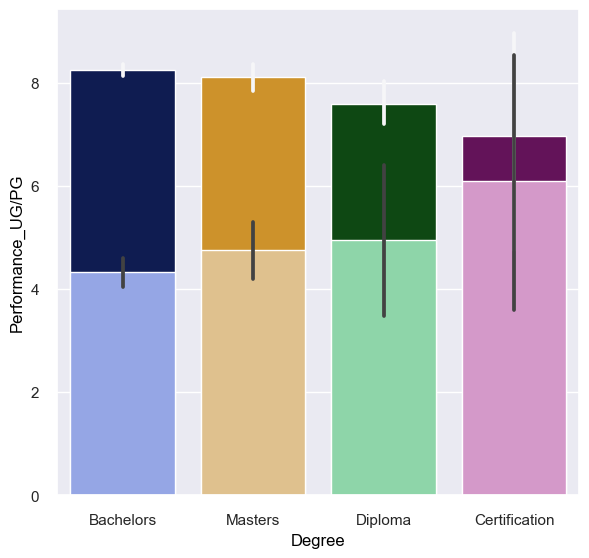

In [1181]:
# Dark shades - when missing score of Performance_UG or Performance_PG is NOT considered
sns.barplot(x='Degree', y='Performance_UG/PG', 
            data=app_data[app_data['Performance_UG/PG'] > 0], palette=['#04165C', '#E89910','#04520B', '#710563'],
           errcolor='#F6F6F8')

# Light shades - when missing score of Performance_UG or Performance_PG is considered
sns.barplot(x='Degree', y='Performance_UG/PG', 
            data=app_data[app_data.Degree!='High School'], palette=['#879EF3', '#ECC581', '#82E1A6', '#DE8FCF'])

The difference in mean of all the groups varies significantly and so does our confidence in our expected mean decreases obviously as we include the missing values or 0 of Performance_UG/PG in our analysis.<br><br>
Here, our approach will be to customise a parameter in our final model where user can choose whether he wants to generate predictions by imputing missing or 0 data with mean or to let it be.

<br><b>Ordinal Encoding and Standardising the data</b>

In [1623]:
app_data.columns

Index(['Python (out of 3)', 'Degree', 'Stream', 'Current Year Of Graduation',
       'Performance_12', 'Performance_10', 'AI_rating_avg',
       'Skill Power Score (from Other Skills)', 'Availability',
       'Performance_UG/PG'],
      dtype='object')

In [1627]:
app_data.rename(columns={'Skill Power Score (from Other Skills)':'Skill_Power_Score_otherskillsNew',
                        'Current Year Of Graduation':'Current_Year_of_Graduation',
                        'Python (out of 3)': 'Python_rating',
                        'Performance_UG/PG':'Performance_UG_PG'},inplace=True)

In [1628]:
def ColumnTransformations(MinMax_cols_list=[], Standard_col_list=[], data=app_data):
    
    tnf1 = OrdinalEncoder(categories=[
                        ['High School', 'Diploma', 'Certification', 'Bachelors', 'Masters'],
                        ['Prefered','Others'],
                        ['Prefered','Others']])
            
    tnf2 = MinMaxScaler()
    tnf3 = StandardScaler()
    
    ColTnf = ColumnTransformer(transformers=[
        ('tnf1', tnf1, ['Degree','Stream','Current_Year_of_Graduation']),
        ('tnf2', tnf2, MinMax_cols_list),
        ('tnf3', tnf3, Standard_col_list)
        ],
        remainder='passthrough')
    
    return ColTnf.fit_transform(data)

<br><b>Data 1: Ordinal Encoded & StandardScaler Normalized Final Data</b>

In [1629]:
data1 = ColumnTransformations( 
                      Standard_col_list=['Python_rating','Performance_12', 'Performance_10', 'AI_rating_avg',
                                        'Skill_Power_Score_otherskillsNew','Performance_UG_PG'])

In [1630]:
df1 = pd.DataFrame(data1,columns=['Degree', 'Stream', 'Current_Year_of_Graduation', 'Python_rating','Performance_12',
                            'Performance_10', 'AI_rating_avg', 'Skill_Power_Score_otherskillsNew',
                            'Performance_UG_PG', 'Availability'])

<br><b>Data 2: Ordinal Encoded & Mix of MinMax & StandardScaler Normalized Final Data</b>

In [1631]:
data2 = ColumnTransformations(
                      MinMax_cols_list=['Performance_12', 'Performance_10','Performance_UG_PG'],
                      Standard_col_list=['Python_rating','AI_rating_avg', 'Skill_Power_Score_otherskillsNew'])

In [1632]:
df2 = pd.DataFrame(data2,columns=['Degree', 'Stream', 'Current_Year_of_Graduation', 
                                  'Performance_12', 'Performance_10','Performance_UG_PG',
                                  'Python_rating', 'AI_rating_avg', 'Skill_Power_Score_otherskillsNew',
                                  'Availability'])

<br><b>Data 3: Ordinal Encoded & Power Transformed Final Data</b>

In [1633]:
from sklearn.preprocessing import PowerTransformer

data3 = ColumnTransformations()
PowTnf = PowerTransformer()
data3 = PowTnf.fit_transform(data3)

In [1634]:
df3 = pd.DataFrame(data3,columns=['Degree', 'Stream', 'Current_Year_of_Graduation',
                            'Python_rating', 'Performance_12', 'Performance_10', 
                            'AI_rating_avg', 'Skill_Power_Score_otherskillsNew', 
                            'Availability','Performance_UG_PG'])

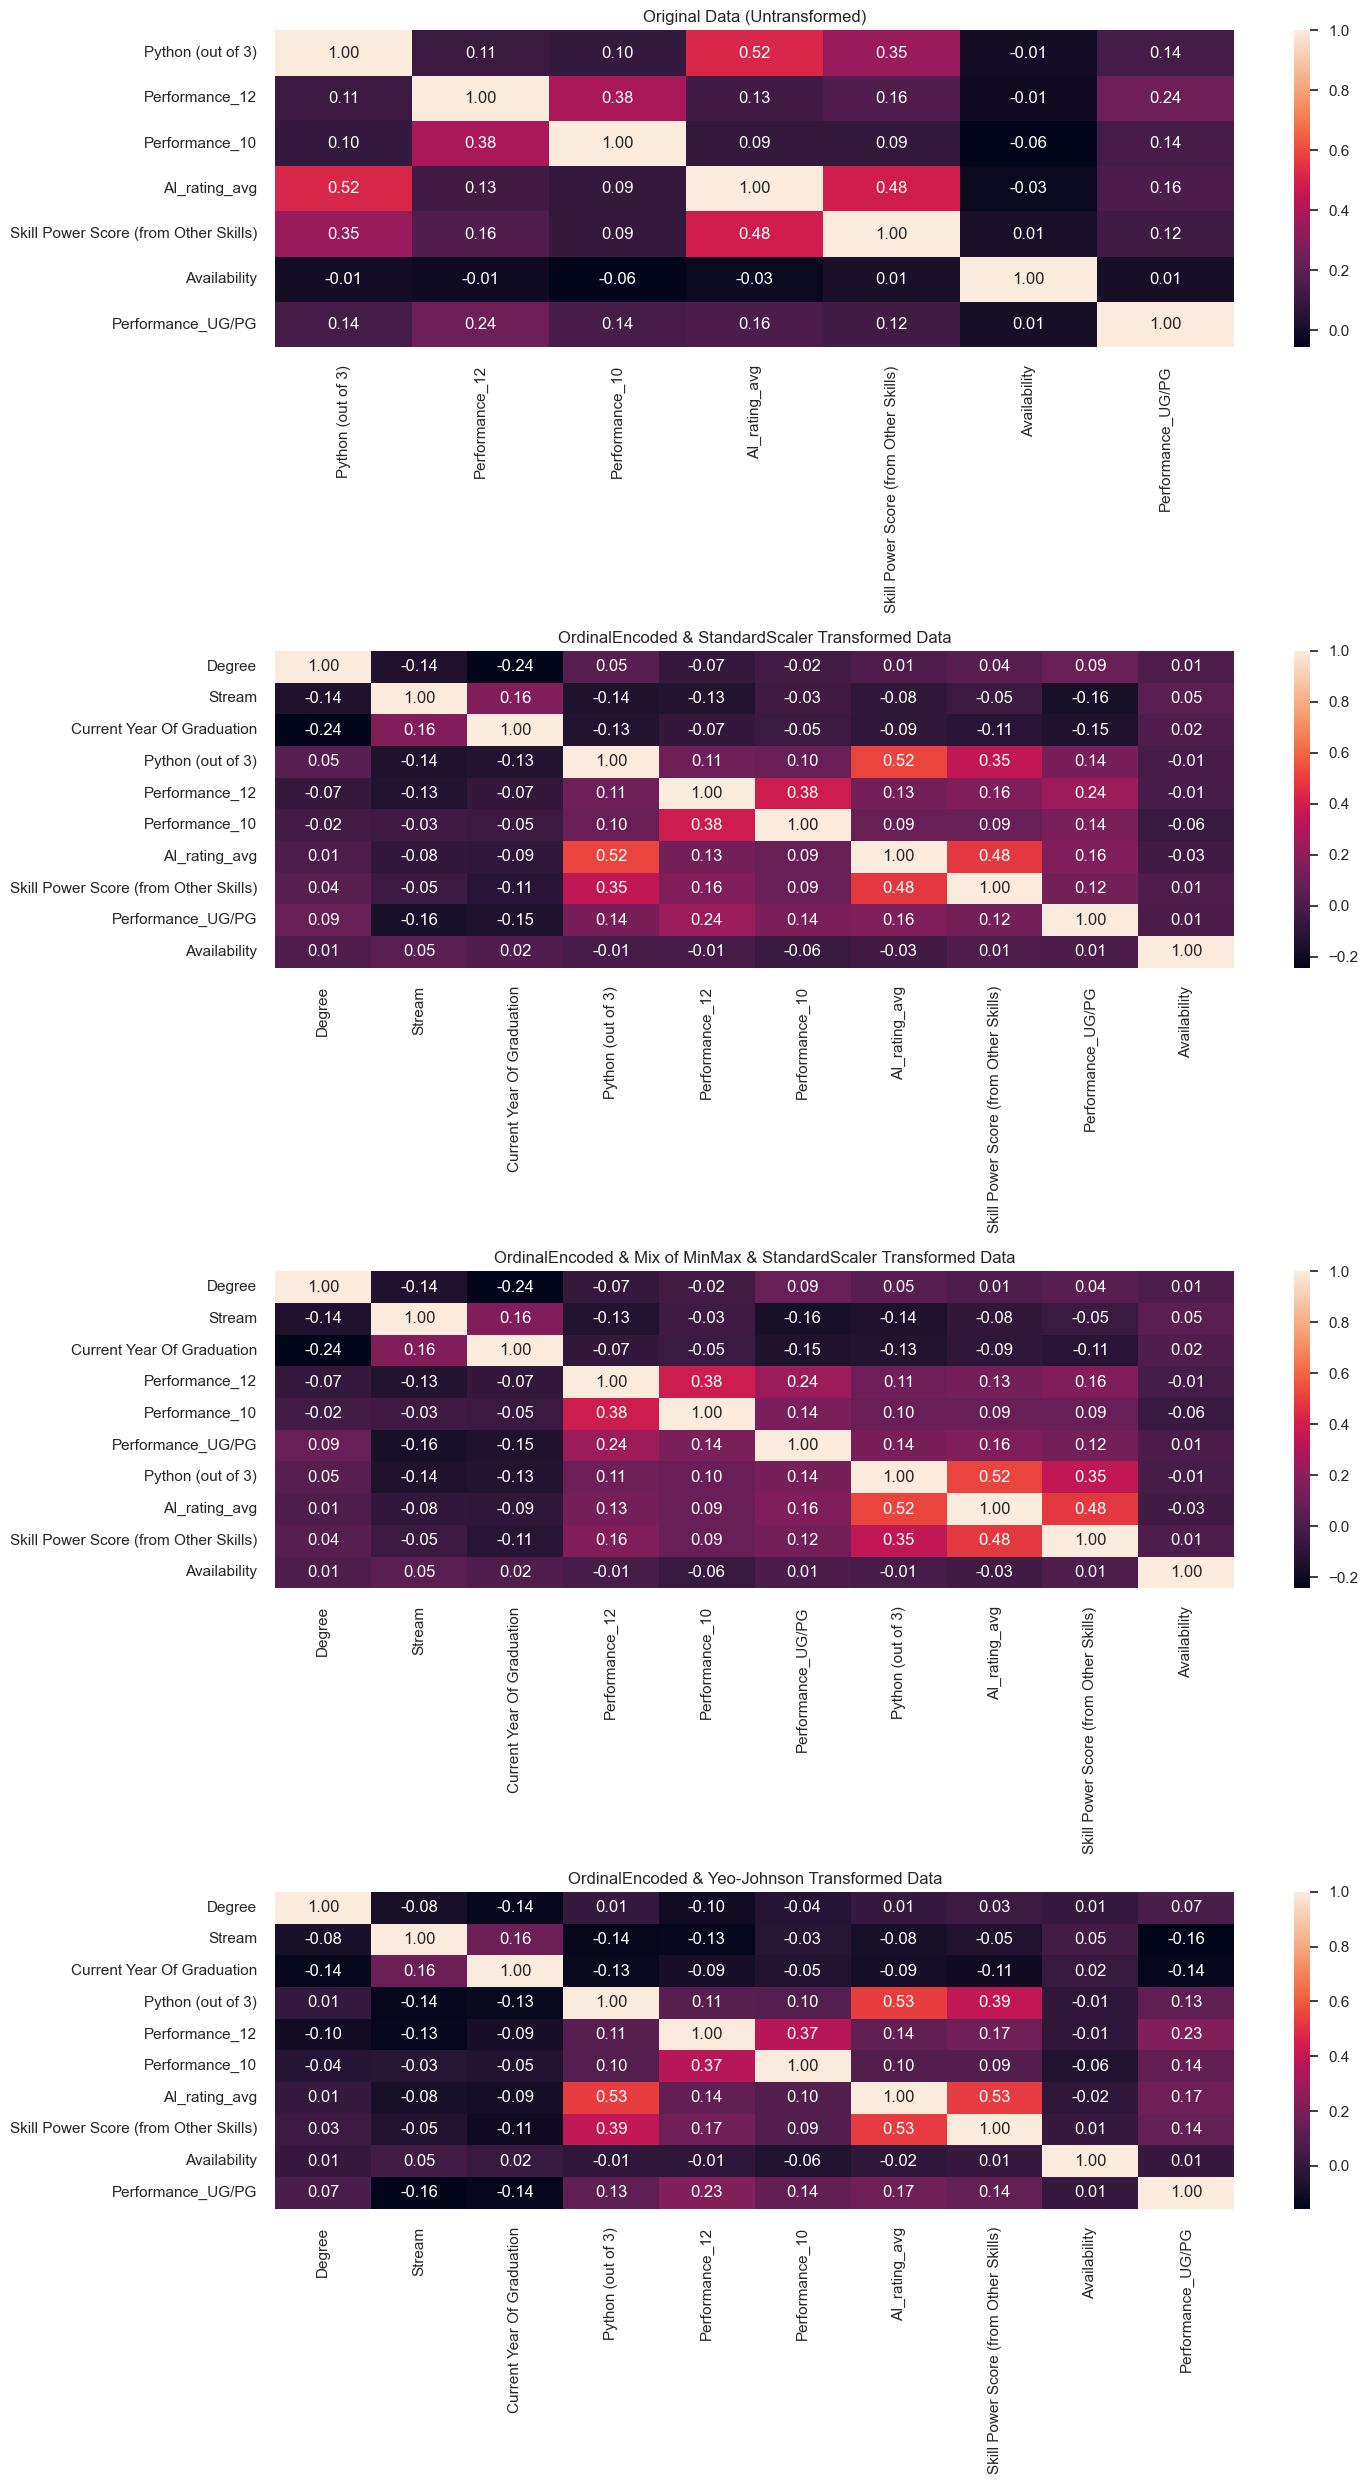

In [1360]:
# Create subplots with 4 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(15, 25))

# Heatmap 1
sns.heatmap(data=app_data.corr(), annot=True, fmt='.2f', ax=axes[0])
axes[0].set_title('Original Data (Untransformed)')

# Heatmap 2
sns.heatmap(data=df1.corr(), annot=True, fmt='.2f', ax=axes[1])
axes[1].set_title('OrdinalEncoded & StandardScaler Transformed Data')

# Heatmap 3
sns.heatmap(data=df2.corr(), annot=True, fmt='.2f', ax=axes[2])
axes[2].set_title('OrdinalEncoded & Mix of MinMax & StandardScaler Transformed Data')

# Heatmap 4
sns.heatmap(data=df3.corr(), annot=True, fmt='.2f', ax=axes[3])
axes[3].set_title('OrdinalEncoded & Yeo-Johnson Transformed Data')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [1635]:
print(np.round(df3.cov(),2).sum(axis=1).sort_values(ascending=False))
default_wts = dict(np.round(df3.cov(),2).sum(axis=1).sort_values(ascending=False))

AI_rating_avg                       2.14
Skill_Power_Score_otherskillsNew    2.02
Python_rating                       1.85
Performance_UG_PG                   1.43
Performance_12                      1.30
Availability                        1.06
Degree                              0.79
Current_Year_of_Graduation          0.51
Stream                              0.48
Performance_10                      0.00
dtype: float64


In [1636]:
def multiply_dicts(dict1, dict2):
    return {key: dict1[key] * dict2[key] for key in dict1.keys()}

# Model Method 1: Scoring

In [1637]:
def ApplicantScoring(applicant_data_row, weightage=default_wts, **kwargs):
    '''since we are working on a static dataset particularly, we can skip writing the condition for dealing
       with missing values in the input data, as we have already dealt with them and imputed them'''
    applicant_data_row = dict(applicant_data_row)
    unweighted_dict = multiply_dicts(applicant_data_row, default_wts)
    if not kwargs:
        result = sum(unweighted_dict.values())
        return result
    else:
        missing_args_set = applicant_data_row.keys() - kwargs.keys()
        if missing_args_set:
            missing_args_wt_dict = {i: 1 for i in missing_args_set}
            kwargs.update(missing_args_wt_dict)
        weighted_dict = multiply_dicts(unweighted_dict, kwargs)
        #print(weighted_dict)
        result = sum(weighted_dict.values())
        return result

In [1638]:
results_model1 = [ApplicantScoring(applicant_data_row[1]) for applicant_data_row in df3.copy().iterrows()]

<b> Scoring Top 5 Candidates (BEST INTERNS) <i><u>without</u> adding extra importance weightages</i> </b>

In [1736]:
# Enumerate the list to get both index and value, then sort based on values in descending order
sorted_indices_m1 = sorted(enumerate(results_model1), key=lambda x: x[1], reverse=True)

# Take the top 5 elements (indices) from the sorted list
# for seeing top 10, change the 5 to 10.
top_5_indices_m1 = [index for index, _ in sorted_indices_m1[:5]]

In [1737]:
app_data.iloc[top_5_indices_m1]

,Python_rating,Degree,Stream,Current_Year_of_Graduation,Performance_12,Performance_10,AI_rating_avg,Skill_Power_Score_otherskillsNew,Availability,Performance_UG_PG
445,3,Bachelors,Prefered,Prefered,9.227174,9.552667,0.778,3.612915,1,9.40
292,3,Masters,Prefered,Prefered,9.227174,8.327383,0.778,1.769646,1,7.30
1073,3,Bachelors,Others,Prefered,8.451254,8.327383,1.000,1.588832,1,8.13
422,3,Masters,Prefered,Prefered,6.857690,8.327383,1.000,2.221350,1,8.70
774,3,Bachelors,Prefered,Prefered,9.227174,8.327383,0.667,2.174034,1,7.80


In [1738]:
refs_data.iloc[top_5_indices_m1]

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
445,NaN,3,3,2,2,".NET, Adobe XD, Amazon Web Server (AWS), Artif...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,9.40/10,91.80/91.80,10.00/10.00
292,NaN,3,3,2,2,"Computer Vision, Data Science, English Profici...","Yes, I am available for 3 months starting imme...",Master of Computer Applications (MCA),Artificial Intelligence,2023,NaN,7.30/10,9.40/9.40,9.30/9.30
1073,NaN,3,3,3,3,"Data Analytics, Data Science, Deep Learning, M...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical,2022,72.86/100,8.13/10,82.20/82.20,88.33/88.33
422,NaN,3,3,3,3,"Deep Learning, Machine Learning, Natural Langu...","Yes, I am available for 3 months starting imme...",Master of Technology (M.Tech),Artificial Intelligence,2023,8.70/10,7.14/10,NaN,NaN
774,NaN,3,2,2,2,"Data Analytics, Python, Data Science, Deep Lea...","Yes, I am available for 3 months starting imme...",Bachelor of Science (B.Sc) (Hons.),Computer Science,2021,NaN,7.80/10,92.00/92.00,9.20/9.20


<b> Scoring Top 5 Candidates (BEST INTERNS) <i><u>with</u> adding extra importance weightages</i> </b>

In [1705]:
temp = [ApplicantScoring(applicant_data_row[1],
                         AI_rating_avg = 1.06,
                         Skill_Power_Score_otherskillsNew = 0.81,
                         Python_rating = 1.08,
                         Performance_UG_PG = 0.9,
                         Performance_12 = 0.55,
                         Availability = 1.5,
                         #Degree = 1.04,
                         Stream = 2.3,
                         Current_Year_of_Graduation = 1.6) for applicant_data_row in df3.copy().iterrows()]

In [1739]:
# Enumerate the list to get both index and value, then sort based on values in descending order
sorted_indices_m2 = sorted(enumerate(temp), key=lambda x: x[1], reverse=True)

# Take the top 5 elements (indices) from the sorted list
top_5_indices_m2 = [index for index, _ in sorted_indices_m2[:5]]

In [1740]:
app_data.iloc[top_5_indices_m2]

,Python_rating,Degree,Stream,Current_Year_of_Graduation,Performance_12,Performance_10,AI_rating_avg,Skill_Power_Score_otherskillsNew,Availability,Performance_UG_PG
445,3,Bachelors,Prefered,Prefered,9.227174,9.552667,0.778,3.612915,1,9.40
1073,3,Bachelors,Others,Prefered,8.451254,8.327383,1.000,1.588832,1,8.13
422,3,Masters,Prefered,Prefered,6.857690,8.327383,1.000,2.221350,1,8.70
292,3,Masters,Prefered,Prefered,9.227174,8.327383,0.778,1.769646,1,7.30
902,3,Bachelors,Others,Others,6.857690,8.327383,0.778,0.789856,1,7.30


In [1741]:
refs_data.iloc[top_5_indices_m2]

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
445,NaN,3,3,2,2,".NET, Adobe XD, Amazon Web Server (AWS), Artif...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,9.40/10,91.80/91.80,10.00/10.00
1073,NaN,3,3,3,3,"Data Analytics, Data Science, Deep Learning, M...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical,2022,72.86/100,8.13/10,82.20/82.20,88.33/88.33
422,NaN,3,3,3,3,"Deep Learning, Machine Learning, Natural Langu...","Yes, I am available for 3 months starting imme...",Master of Technology (M.Tech),Artificial Intelligence,2023,8.70/10,7.14/10,NaN,NaN
292,NaN,3,3,2,2,"Computer Vision, Data Science, English Profici...","Yes, I am available for 3 months starting imme...",Master of Computer Applications (MCA),Artificial Intelligence,2023,NaN,7.30/10,9.40/9.40,9.30/9.30
902,NaN,3,3,2,2,"Arduino, Data Analytics, Jira, MS-Excel, Machi...","Yes, I am available for 3 months starting imme...",Bachelor of Technology (B.Tech),NaN,2017,NaN,73.00/100,NaN,NaN


<b> Scoring Top 5 Candidates (BEST INTERNS) <i><u>with</u> adding extra (Different set of) importance weightages</i> </b>

In [1748]:
temp1 = [ApplicantScoring(applicant_data_row[1],
                         AI_rating_avg = 1.21,
                         Skill_Power_Score_otherskillsNew = 0.97,
                         Python_rating = 1.04,
                         Performance_UG_PG = 0.83,
                         Performance_12 = 0.65,
                         Availability = 1.5,
                         #Degree = 1.04,
                         Stream = 2.14,
                         Current_Year_of_Graduation = 1.6) for applicant_data_row in df3.copy().iterrows()]

In [1749]:
# Enumerate the list to get both index and value, then sort based on values in descending order
sorted_indices_m3 = sorted(enumerate(temp1), key=lambda x: x[1], reverse=True)

# Take the top 5 elements (indices) from the sorted list
top_5_indices_m3 = [index for index, _ in sorted_indices_m3[:5]]

In [1750]:
app_data.iloc[top_5_indices_m3]

,Python_rating,Degree,Stream,Current_Year_of_Graduation,Performance_12,Performance_10,AI_rating_avg,Skill_Power_Score_otherskillsNew,Availability,Performance_UG_PG
445,3,Bachelors,Prefered,Prefered,9.227174,9.552667,0.778,3.612915,1,9.40
1073,3,Bachelors,Others,Prefered,8.451254,8.327383,1.000,1.588832,1,8.13
422,3,Masters,Prefered,Prefered,6.857690,8.327383,1.000,2.221350,1,8.70
292,3,Masters,Prefered,Prefered,9.227174,8.327383,0.778,1.769646,1,7.30
985,3,Bachelors,Others,Prefered,8.451254,9.552667,0.667,1.578222,1,7.50


In [1751]:
refs_data.iloc[top_5_indices_m3]

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
445,NaN,3,3,2,2,".NET, Adobe XD, Amazon Web Server (AWS), Artif...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,9.40/10,91.80/91.80,10.00/10.00
1073,NaN,3,3,3,3,"Data Analytics, Data Science, Deep Learning, M...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical,2022,72.86/100,8.13/10,82.20/82.20,88.33/88.33
422,NaN,3,3,3,3,"Deep Learning, Machine Learning, Natural Langu...","Yes, I am available for 3 months starting imme...",Master of Technology (M.Tech),Artificial Intelligence,2023,8.70/10,7.14/10,NaN,NaN
292,NaN,3,3,2,2,"Computer Vision, Data Science, English Profici...","Yes, I am available for 3 months starting imme...",Master of Computer Applications (MCA),Artificial Intelligence,2023,NaN,7.30/10,9.40/9.40,9.30/9.30
985,NaN,3,2,2,2,"Computer Vision, Data Analytics, English Profi...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),Mechanical Engineering,2022,75.00/100,NaN,85.00/85.00,100.00/100.00


<br><br>
<b> We observe the similar set of profiles/applicants at different settings with different amount of importance given to different features, this concludes that our model is actually very consistent and isn't throwing random observations, it is able to distinct set of profiles clearly enough while scoring to determine the Top 5 interns/applicants.<br><br>
For the recruiter's ease, they can customise the amount of importance they wish to assign to what feature to filter the best set of interns</b>

/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prabalsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

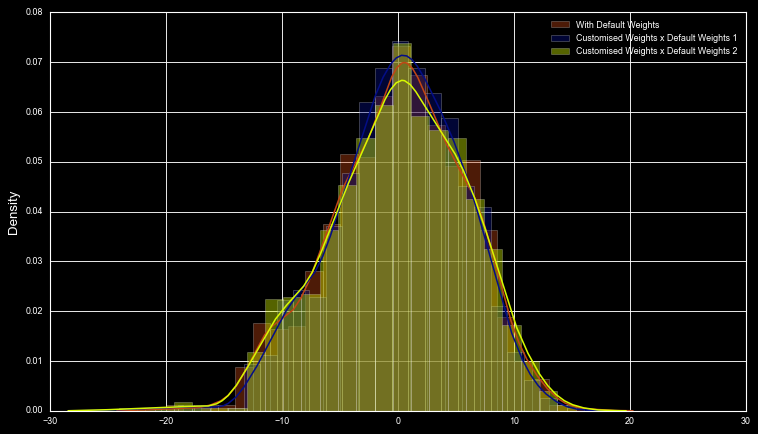

In [1761]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10,6]
sns.distplot(results_model1, color='#C14614',label='With Default Weights')
sns.distplot(temp, color='#040E86',label='Customised Weights x Default Weights 1')
sns.distplot(temp1, color='#D7F901',label='Customised Weights x Default Weights 2')
plt.legend()